In [1]:
import mlflow
from mlflow.models import infer_signature

In [2]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

In [3]:
experiment_name = "/Shared/MLflowP7/"

In [4]:
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/456784296874310446', creation_time=1709819838979, experiment_id='456784296874310446', last_update_time=1709819838979, lifecycle_stage='active', name='/Shared/MLflowP7/', tags={}>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
application_test = pd.read_csv("application_test.csv")
application_train = pd.read_csv("application_train.csv")
bureau = pd.read_csv("bureau[1].csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
HomeCredit_columns_description = pd.read_csv("HomeCredit_columns_description.csv", encoding='iso-8859-1')
installments_payments = pd.read_csv("installments_payments[1].csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
previous_application = pd.read_csv("previous_application.csv")
sample_submission = pd.read_csv("sample_submission[1].csv")

In [7]:
column_mapping = dict(zip(HomeCredit_columns_description['Row'], HomeCredit_columns_description['Description']))

In [8]:
application_train_2 = application_train.rename(columns=column_mapping)

In [9]:
application_test_2 = application_test.rename(columns=column_mapping)

In [10]:
application_train.shape 

(307511, 122)

In [11]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [12]:
def missing(df):
    missing_data = pd.DataFrame(round(df.isna().sum()*100/len(df),1)).reset_index().rename(columns={"index":"column",0:"missing_data"})
    return missing_data

In [13]:
missing(application_train)

column  missing_data
0                    SK_ID_CURR           0.0
1                        TARGET           0.0
2            NAME_CONTRACT_TYPE           0.0
3                   CODE_GENDER           0.0
4                  FLAG_OWN_CAR           0.0
..                          ...           ...
117   AMT_REQ_CREDIT_BUREAU_DAY          13.5
118  AMT_REQ_CREDIT_BUREAU_WEEK          13.5
119   AMT_REQ_CREDIT_BUREAU_MON          13.5
120   AMT_REQ_CREDIT_BUREAU_QRT          13.5
121  AMT_REQ_CREDIT_BUREAU_YEAR          13.5

[122 rows x 2 columns]

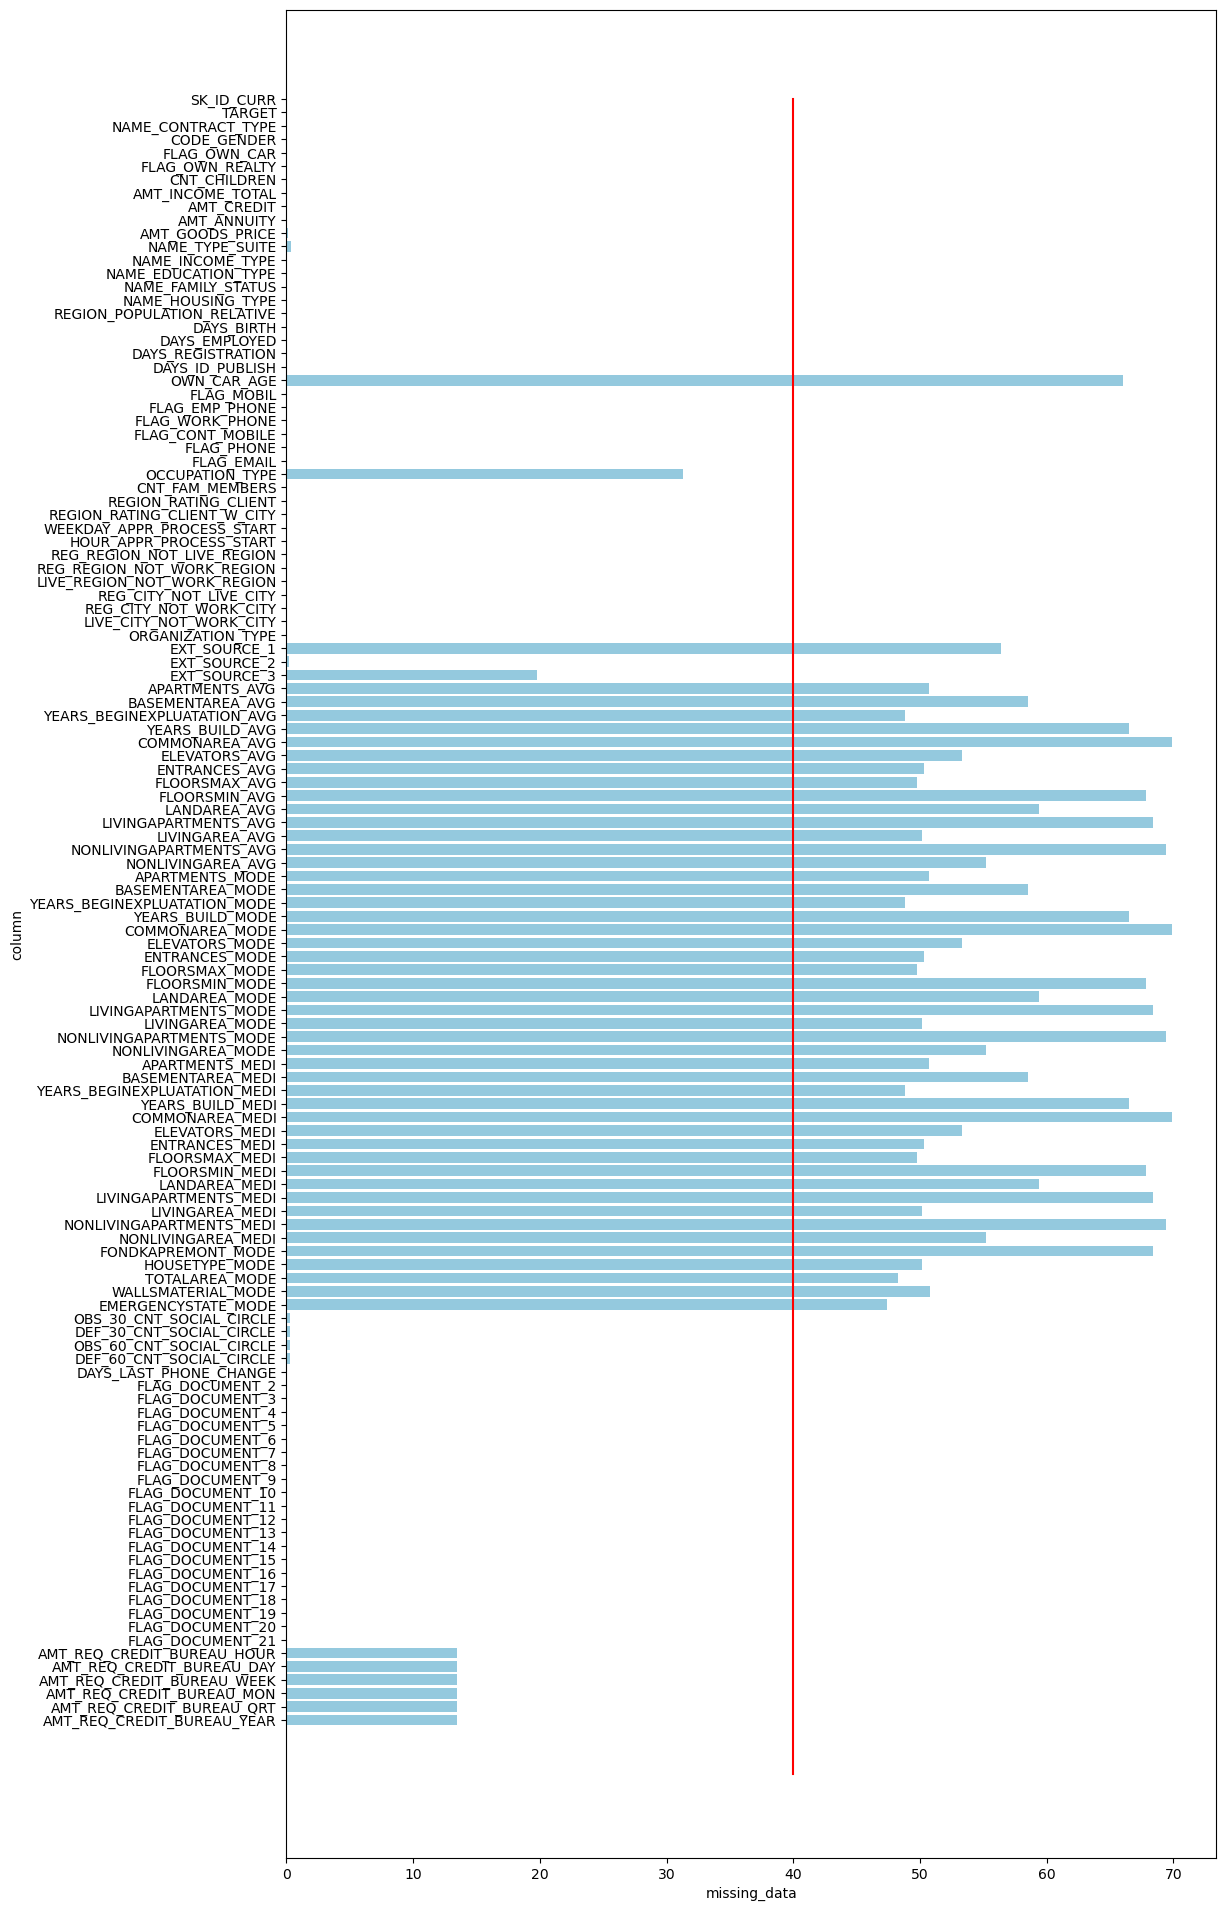

In [14]:
plt.figure(figsize=(12,24))
sns.barplot(x="missing_data", y="column", data=missing(application_train), color="skyblue")
plt.plot([40,40],[0,125], color="red")

In [15]:
application_train.select_dtypes(include=["float64"]).shape

(307511, 65)

In [16]:
application_train.select_dtypes(include=["int"]).shape

(307511, 41)

In [17]:
application_train.select_dtypes(include=["object"]).shape

(307511, 16)

In [18]:
missing(application_train.select_dtypes(include=["float64"]))

column  missing_data
0             AMT_INCOME_TOTAL           0.0
1                   AMT_CREDIT           0.0
2                  AMT_ANNUITY           0.0
3              AMT_GOODS_PRICE           0.1
4   REGION_POPULATION_RELATIVE           0.0
..                         ...           ...
60   AMT_REQ_CREDIT_BUREAU_DAY          13.5
61  AMT_REQ_CREDIT_BUREAU_WEEK          13.5
62   AMT_REQ_CREDIT_BUREAU_MON          13.5
63   AMT_REQ_CREDIT_BUREAU_QRT          13.5
64  AMT_REQ_CREDIT_BUREAU_YEAR          13.5

[65 rows x 2 columns]

# FLOAT VARIABLES 

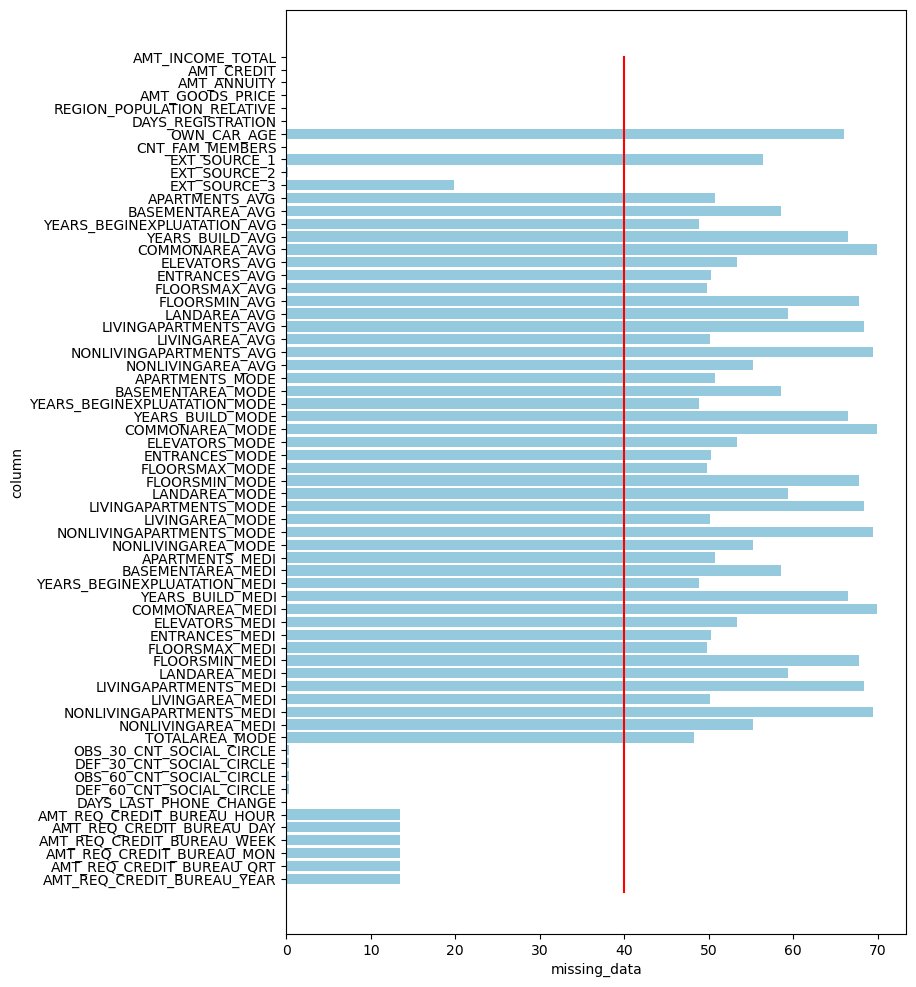

In [19]:
plt.figure(figsize=(8,12))
sns.barplot(x="missing_data", y="column", data=missing(application_train.select_dtypes(include=["float64"])), color="skyblue")
plt.plot([40,40],[0,65], color="red")

In [20]:
print(missing(application_train.select_dtypes(include=["float64"]))[missing(application_train.select_dtypes(include=["float64"])).missing_data>40].shape[0],'/',len(missing(application_train.select_dtypes(include=["float64"]))))

45 / 65


In [21]:
def corr(df,typ,miss,cor):
    dataframe = df[missing(df.select_dtypes(include=[typ]))[missing(df.select_dtypes(include=[typ])).missing_data>=miss].column.values].corr()
    dataframe = dataframe[dataframe>cor].count()
    dataframe = dataframe[dataframe>1]
    plt.figure(figsize=(22,16))
    heatmap = list(dataframe.index)
    heatmap = sns.heatmap(df.select_dtypes(include=[typ])[df.select_dtypes(include=[typ]).columns.intersection(heatmap)].corr(),annot=True)
    return dataframe, heatmap

(APARTMENTS_AVG                  21
 BASEMENTAREA_AVG                16
 YEARS_BEGINEXPLUATATION_AVG      3
 YEARS_BUILD_AVG                  3
 COMMONAREA_AVG                   3
 ELEVATORS_AVG                   16
 ENTRANCES_AVG                   12
 FLOORSMAX_AVG                   14
 FLOORSMIN_AVG                    6
 LANDAREA_AVG                     3
 LIVINGAPARTMENTS_AVG            16
 LIVINGAREA_AVG                  21
 NONLIVINGAPARTMENTS_AVG          3
 NONLIVINGAREA_AVG                3
 APARTMENTS_MODE                 19
 BASEMENTAREA_MODE               16
 YEARS_BEGINEXPLUATATION_MODE     3
 YEARS_BUILD_MODE                 3
 COMMONAREA_MODE                  3
 ELEVATORS_MODE                  16
 ENTRANCES_MODE                   8
 FLOORSMAX_MODE                  15
 FLOORSMIN_MODE                   6
 LANDAREA_MODE                    3
 LIVINGAPARTMENTS_MODE           16
 LIVINGAREA_MODE                 20
 NONLIVINGAPARTMENTS_MODE         3
 NONLIVINGAREA_MODE         

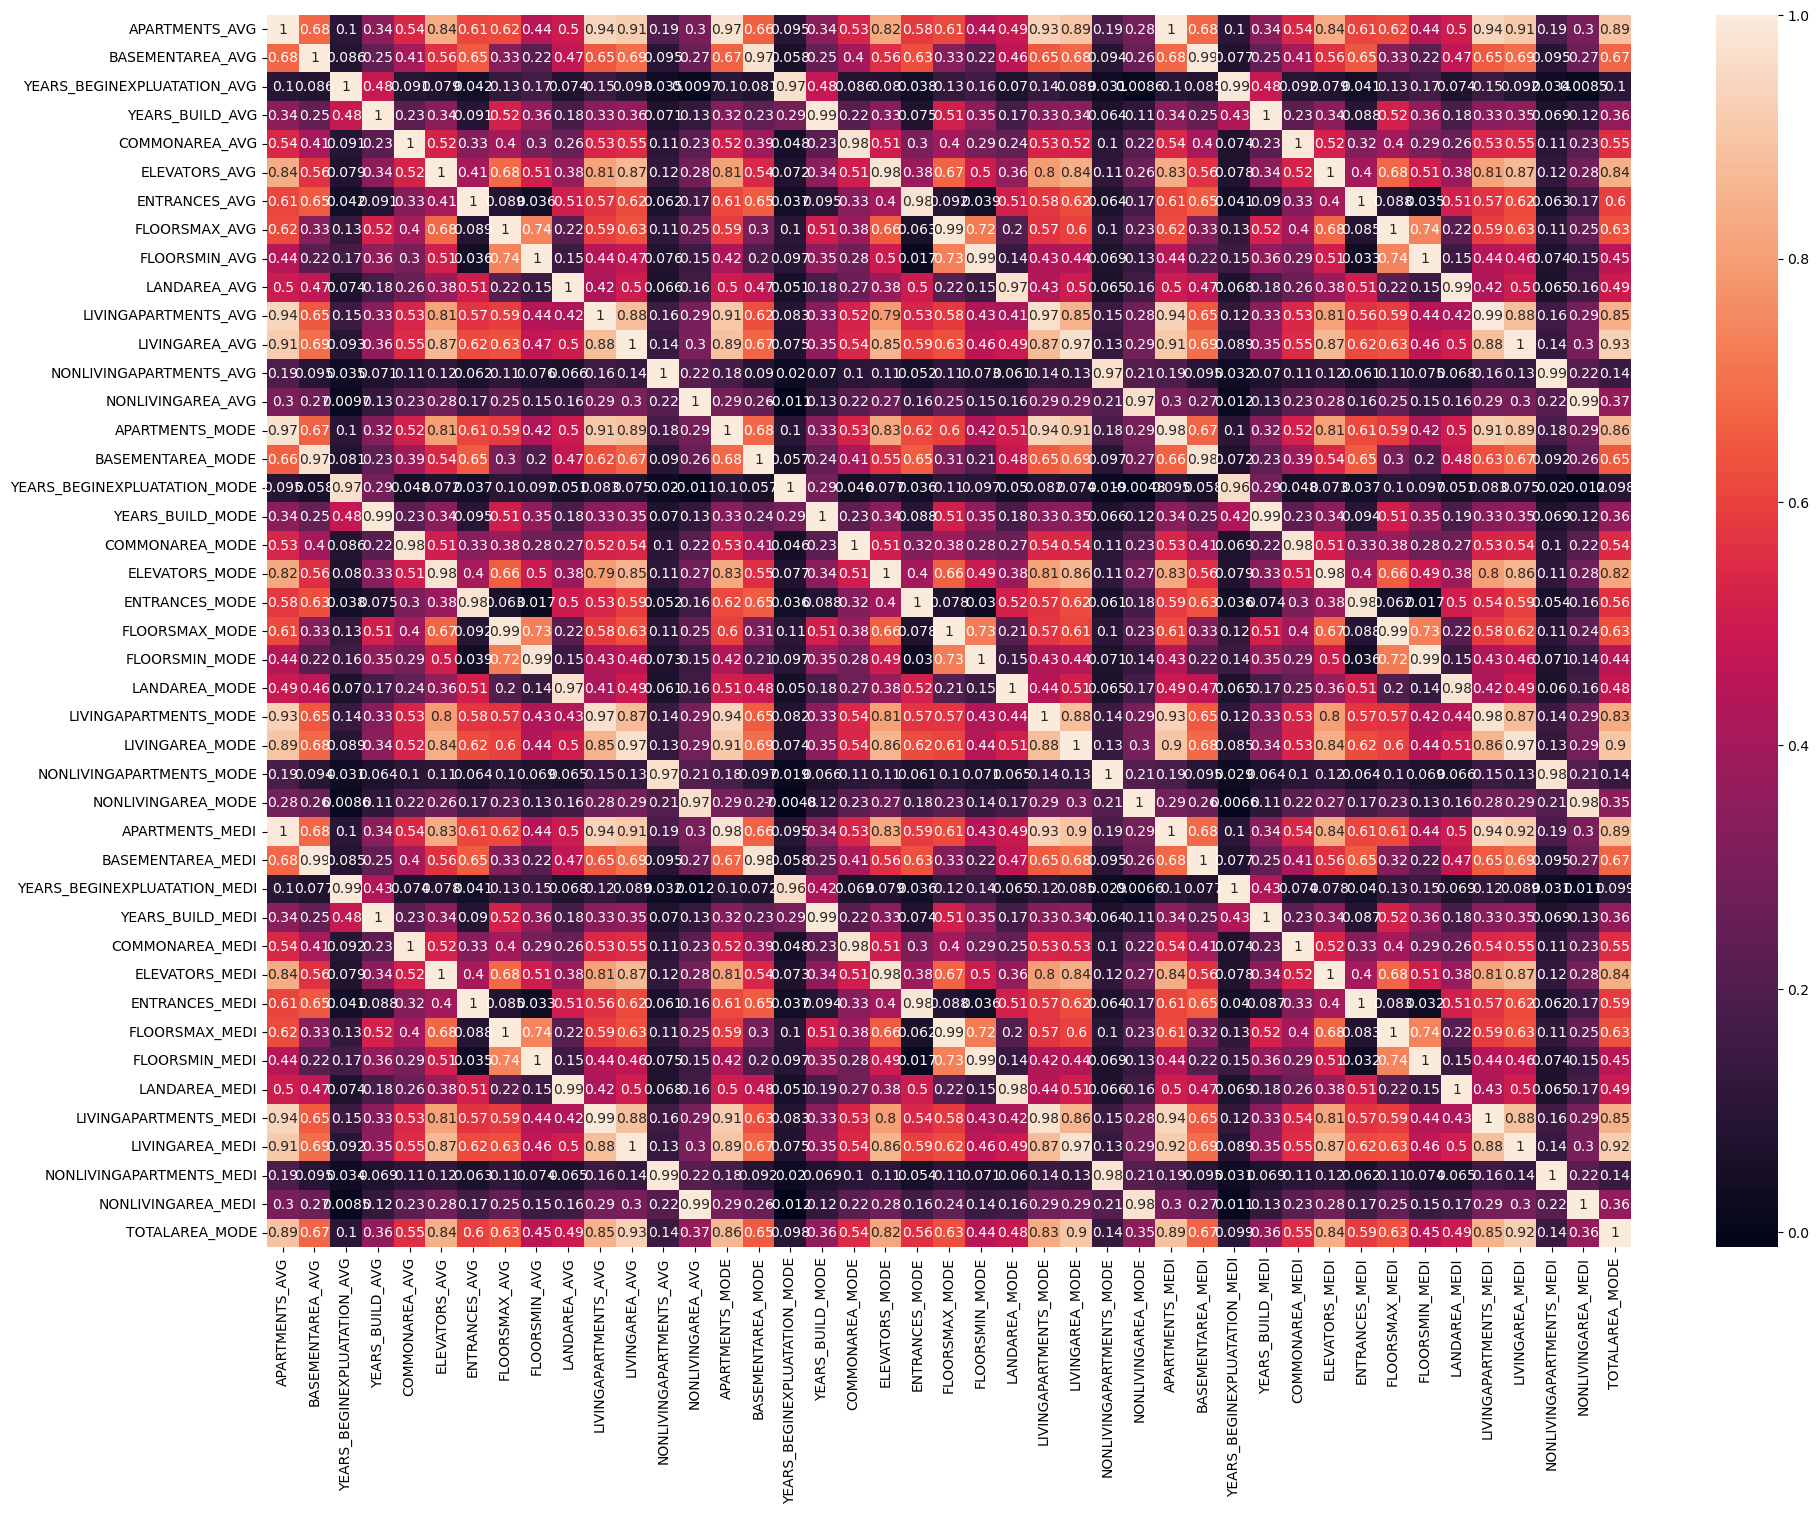

In [22]:
corr(application_train,'float64',40,0.6)

In [23]:
mode_medi_drop = [x for x in application_train.select_dtypes(include=["float64"]) if "MODE" in x or "MEDI" in x]
application_train_float = application_train.select_dtypes(include=["float64"]).drop(columns=mode_medi_drop)

In [24]:
application_train_float.shape

(307511, 36)

In [25]:
application_train.shape

(307511, 122)

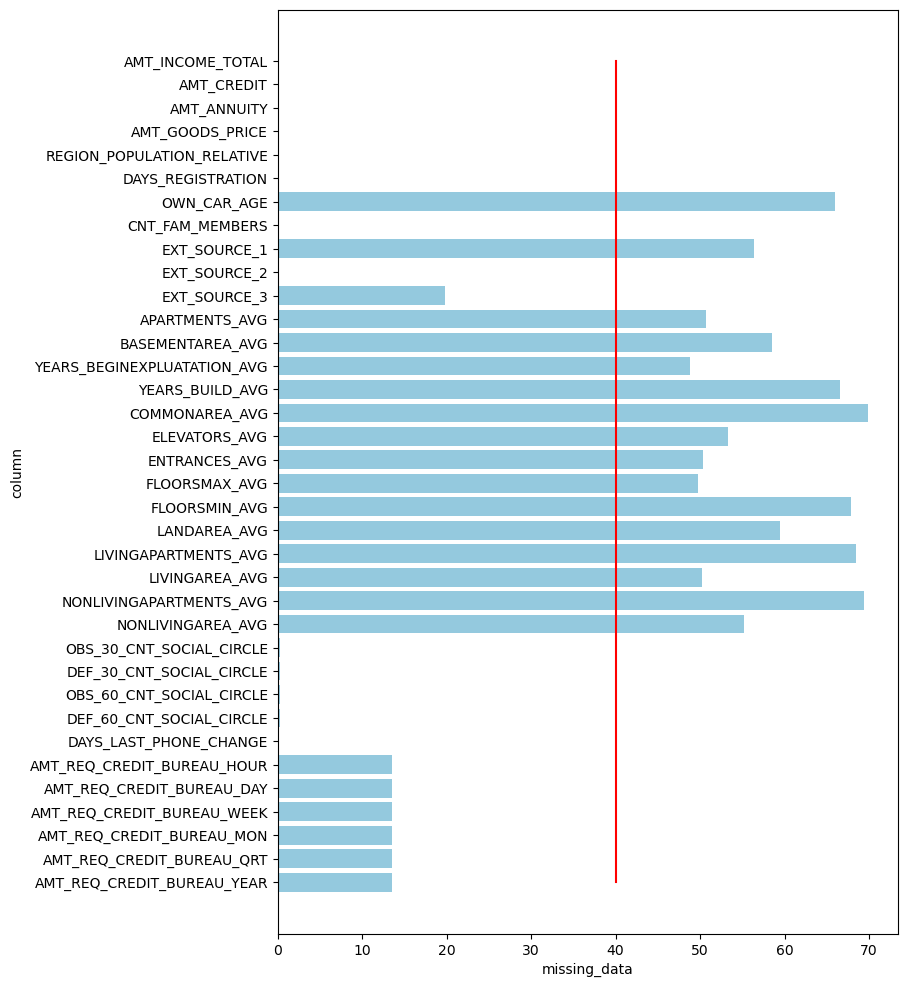

In [26]:
plt.figure(figsize=(8,12))
sns.barplot(x="missing_data", y="column", data=missing(application_train_float), color="skyblue")
plt.plot([40,40],[0,35], color="red")

(APARTMENTS_AVG          7
 BASEMENTAREA_AVG        5
 ELEVATORS_AVG           5
 ENTRANCES_AVG           4
 FLOORSMAX_AVG           5
 FLOORSMIN_AVG           2
 LIVINGAPARTMENTS_AVG    5
 LIVINGAREA_AVG          7
 dtype: int64,
 <Axes: >)

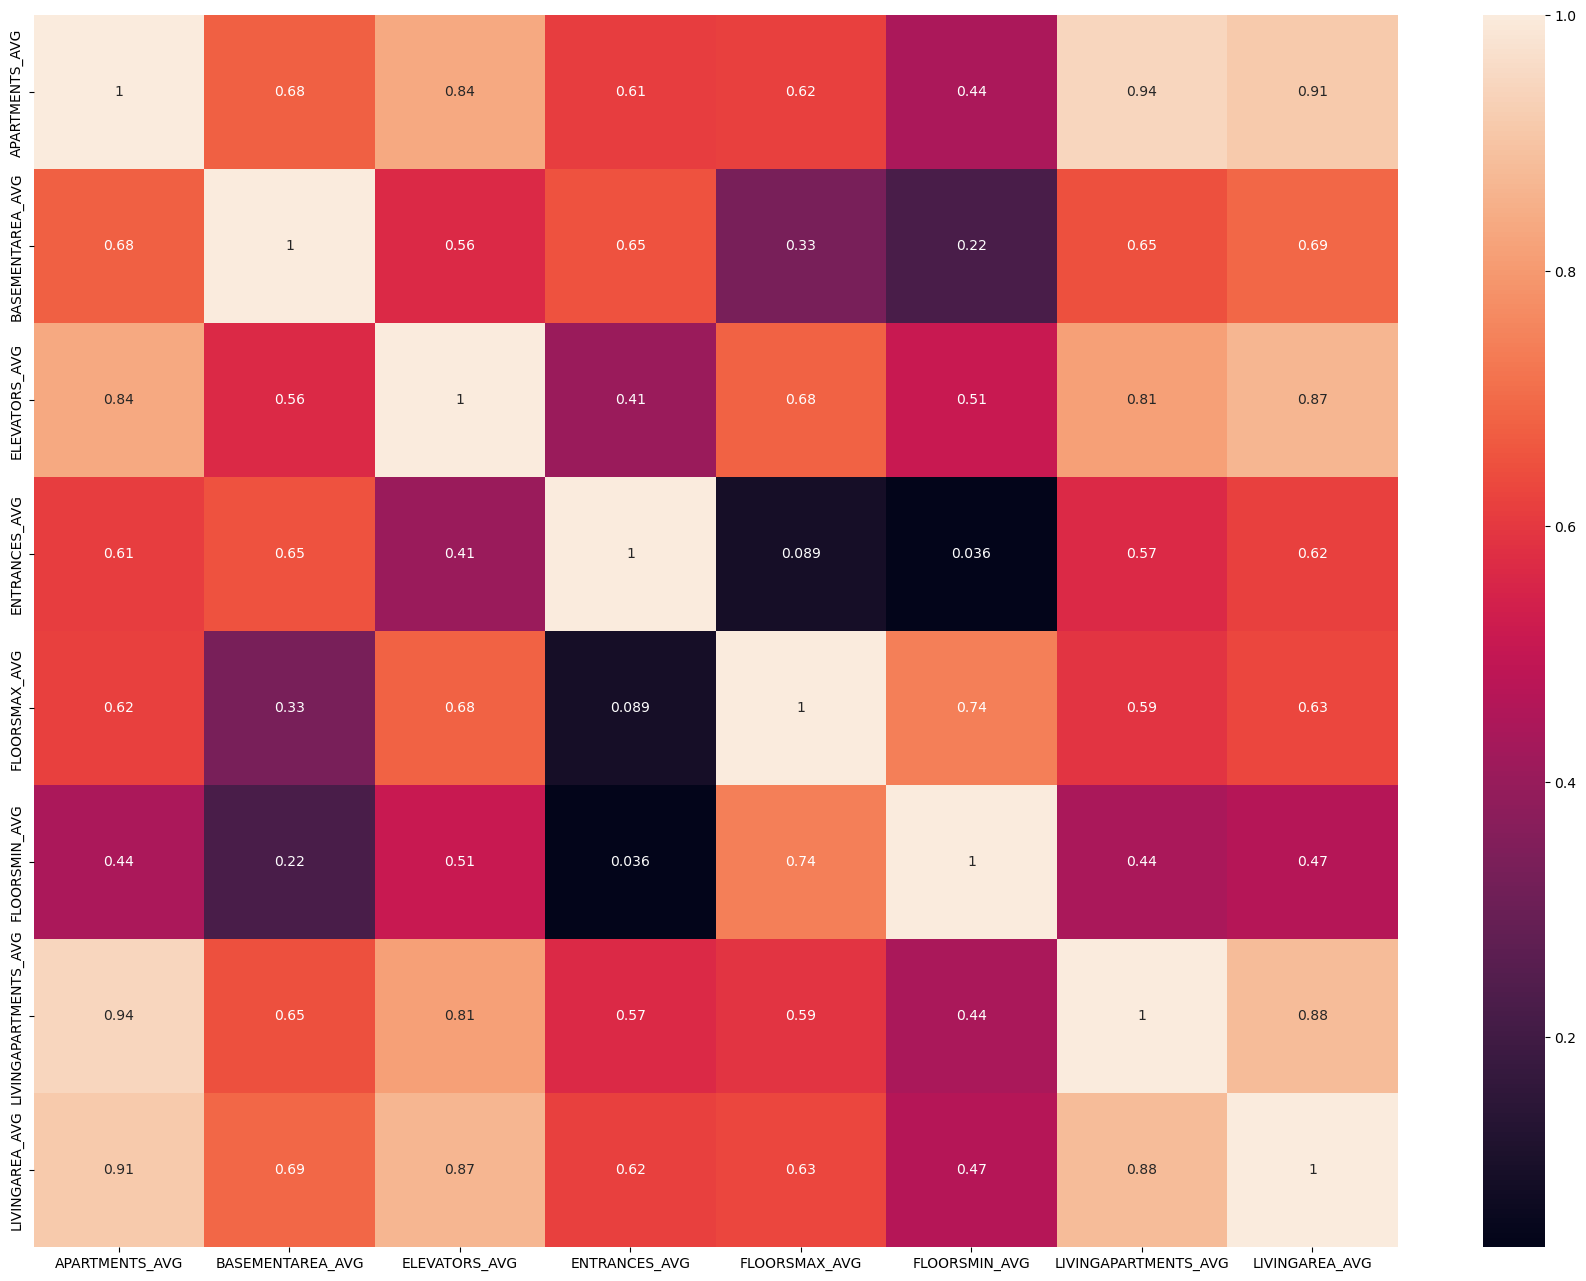

In [27]:
corr(application_train_float,'float64',40,0.6)

In [28]:
apartments_drop = [x for x in application_train_float.select_dtypes(include=["float64"]) if "LIVING" in x or "FLOOR" in x or "BASE" in x or "ENT" in x or "ELE" in x]
application_train_float = application_train_float.select_dtypes(include=["float64"]).drop(columns=apartments_drop)

In [29]:
application_train.shape

(307511, 122)

(AMT_INCOME_TOTAL               18
 AMT_CREDIT                     19
 AMT_ANNUITY                    19
 AMT_GOODS_PRICE                19
 REGION_POPULATION_RELATIVE     13
 DAYS_REGISTRATION              15
 OWN_CAR_AGE                     8
 CNT_FAM_MEMBERS                13
 EXT_SOURCE_1                   14
 EXT_SOURCE_2                   15
 EXT_SOURCE_3                    8
 YEARS_BEGINEXPLUATATION_AVG    17
 YEARS_BUILD_AVG                18
 COMMONAREA_AVG                 16
 LANDAREA_AVG                   16
 OBS_30_CNT_SOCIAL_CIRCLE       15
 DEF_30_CNT_SOCIAL_CIRCLE       10
 OBS_60_CNT_SOCIAL_CIRCLE       15
 DEF_60_CNT_SOCIAL_CIRCLE        9
 DAYS_LAST_PHONE_CHANGE          8
 AMT_REQ_CREDIT_BUREAU_HOUR     11
 AMT_REQ_CREDIT_BUREAU_DAY      13
 AMT_REQ_CREDIT_BUREAU_WEEK     12
 AMT_REQ_CREDIT_BUREAU_MON      13
 AMT_REQ_CREDIT_BUREAU_QRT      10
 AMT_REQ_CREDIT_BUREAU_YEAR     10
 dtype: int64,
 <Axes: >)

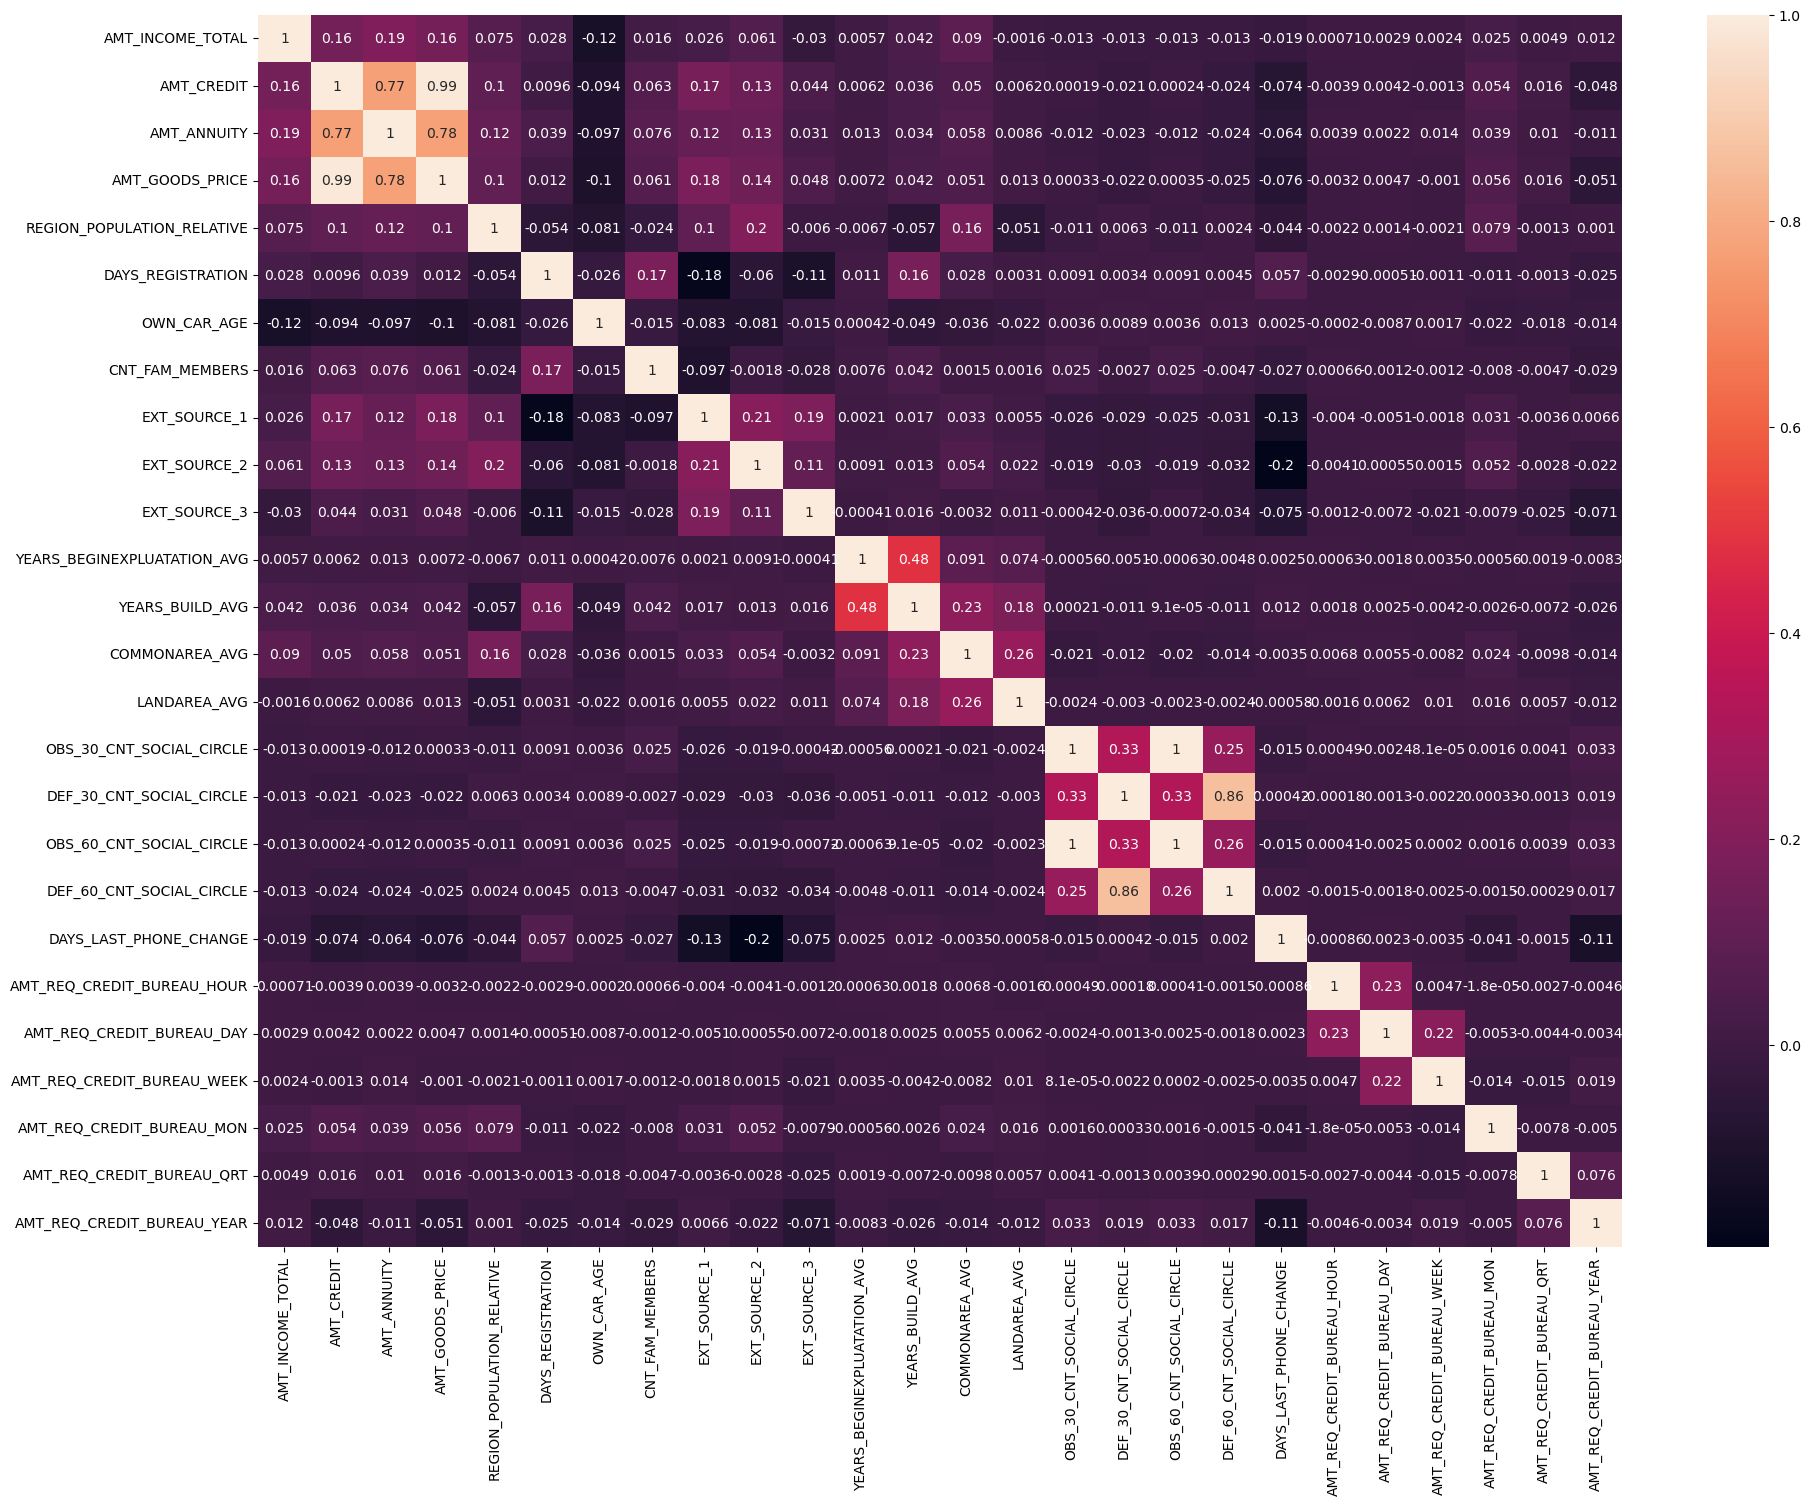

In [30]:
corr(application_train_float,'float64',0,0)

In [31]:
last_drop = [x for x in application_train_float.select_dtypes(include=["float64"]) if "DEF_30" in x or "AMT_GOODS" in x or "AMT_ANNUITY" in x]
application_train_float = application_train_float.select_dtypes(include=["float64"]).drop(columns=last_drop)

In [32]:
application_train.shape

(307511, 122)

In [33]:
application_train_float

AMT_INCOME_TOTAL  AMT_CREDIT  REGION_POPULATION_RELATIVE  \
0               202500.0    406597.5                    0.018801   
1               270000.0   1293502.5                    0.003541   
2                67500.0    135000.0                    0.010032   
3               135000.0    312682.5                    0.008019   
4               121500.0    513000.0                    0.028663   
...                  ...         ...                         ...   
307506          157500.0    254700.0                    0.032561   
307507           72000.0    269550.0                    0.025164   
307508          153000.0    677664.0                    0.005002   
307509          171000.0    370107.0                    0.005313   
307510          157500.0    675000.0                    0.046220   

        DAYS_REGISTRATION  OWN_CAR_AGE  CNT_FAM_MEMBERS  EXT_SOURCE_1  \
0                 -3648.0          NaN              1.0      0.083037   
1                 -1186.0          NaN              2.0      0.311267   
2                 -4260.0         26.0              1.0           NaN   
3                 -9833.0          NaN              2.0           NaN   
4                 -4311.0          NaN              1.0           NaN   
...                   ...          ...              ...           ...   
307506            -8456.0          NaN              1.0      0.145570   
307507            -4388.0          NaN              1.0           NaN   
307508            -6737.0          NaN              1.0      0.744026   
307509            -2562.0          NaN              2.0           NaN   
307510            -5128.0          NaN              2.0      0.734460   

        EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  ...  \
0           0.262949      0.139376                       0.9722  ...   
1           0.622246           NaN                       0.9851  ...   
2           0.555912      0.729567                          NaN  ...   
3           0.650442           NaN                          NaN  ...   
4           0.322738           NaN                          NaN  ...   
...              ...           ...                          ...  ...   
307506      0.681632           NaN                       0.9876  ...   
307507      0.115992           NaN                       0.9727  ...   
307508      0.535722      0.218859                       0.9816  ...   
307509      0.514163      0.661024                       0.9771  ...   
307510      0.708569      0.113922                       0.9881  ...   

        OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            1.0                       1.0   
2                            0.0                       0.0   
3                            2.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       6.0                       6.0   
307509                       0.0                       0.0   
307510                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                            2.0                 -1134.0   
1                            0.0                  -828.0   
2                            0.0                  -815.0   
3                            0.0                  -617.0   
4                            0.0                 -1106.0   
...                          ...                     ...   
307506                       0.0                  -273.0   
307507                       0.0                     0.0   
307508                       0.0                 -1909.0   
307509                       0.0                  -322.0   
307510                       0.0            

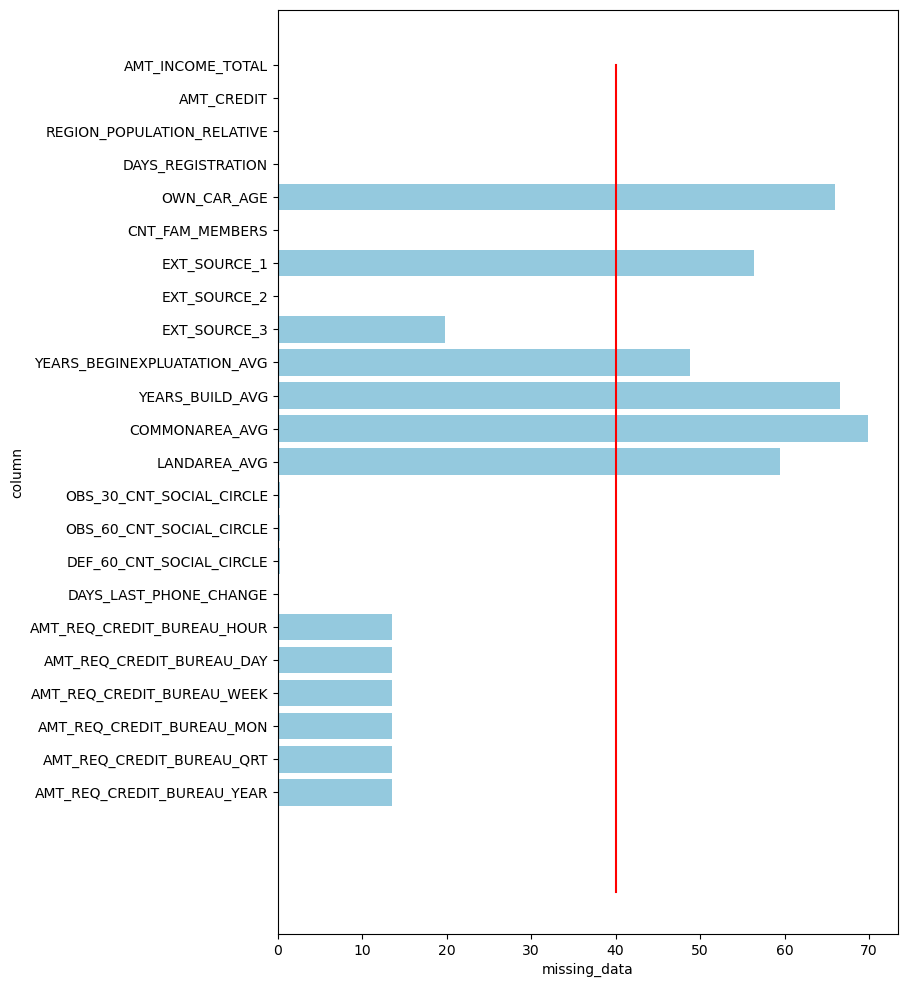

In [34]:
plt.figure(figsize=(8,12))
sns.barplot(x="missing_data", y="column", data=missing(application_train_float), color="skyblue")
plt.plot([40,40],[0,25], color="red")

# INT VARIABLES

In [35]:
application_train.select_dtypes(include=["int"])

SK_ID_CURR  TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0           100002       1             0       -9461           -637   
1           100003       0             0      -16765          -1188   
2           100004       0             0      -19046           -225   
3           100006       0             0      -19005          -3039   
4           100007       0             0      -19932          -3038   
...            ...     ...           ...         ...            ...   
307506      456251       0             0       -9327           -236   
307507      456252       0             0      -20775         365243   
307508      456253       0             0      -14966          -7921   
307509      456254       1             0      -11961          -4786   
307510      456255       0             0      -16856          -1262   

        DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0                 -2120           1               1                0   
1                  -291           1               1                0   
2                 -2531           1               1                1   
3                 -2437           1               1                0   
4                 -3458           1               1                0   
...                 ...         ...             ...              ...   
307506            -1982           1               1                0   
307507            -4090           1               0                0   
307508            -5150           1               1                0   
307509             -931           1               1                0   
307510             -410           1               1                1   

        FLAG_CONT_MOBILE  ...  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                      1  ...                 0                 0   
1                      1  ...                 0                 0   
2                      1  ...                 0                 0   
3                      1  ...                 0                 0   
4                      1  ...                 0                 0   
...                  ...  ...               ...               ...   
307506                 1  ...                 0                 0   
307507                 1  ...                 0                 0   
307508                 1  ...                 0                 0   
307509                 1  ...                 0                 0   
307510                 1  ...                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0          

<Axes: xlabel='missing_data', ylabel='column'>

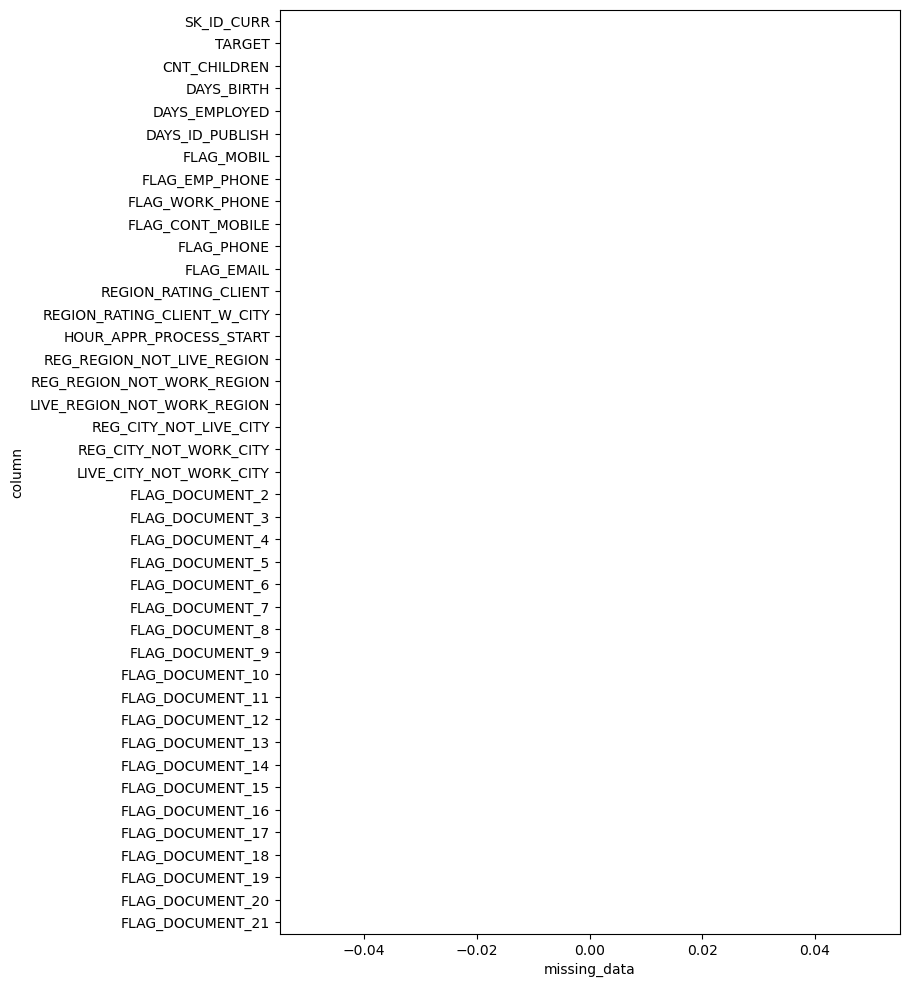

In [36]:
plt.figure(figsize=(8,12))
sns.barplot(x="missing_data", y="column", data=missing(application_train.select_dtypes(include=["int"])), color="skyblue")

(DAYS_BIRTH                     2
 FLAG_EMP_PHONE                 2
 REGION_RATING_CLIENT           2
 REGION_RATING_CLIENT_W_CITY    2
 REG_REGION_NOT_WORK_REGION     2
 LIVE_REGION_NOT_WORK_REGION    2
 REG_CITY_NOT_WORK_CITY         2
 LIVE_CITY_NOT_WORK_CITY        2
 dtype: int64,
 <Axes: >)

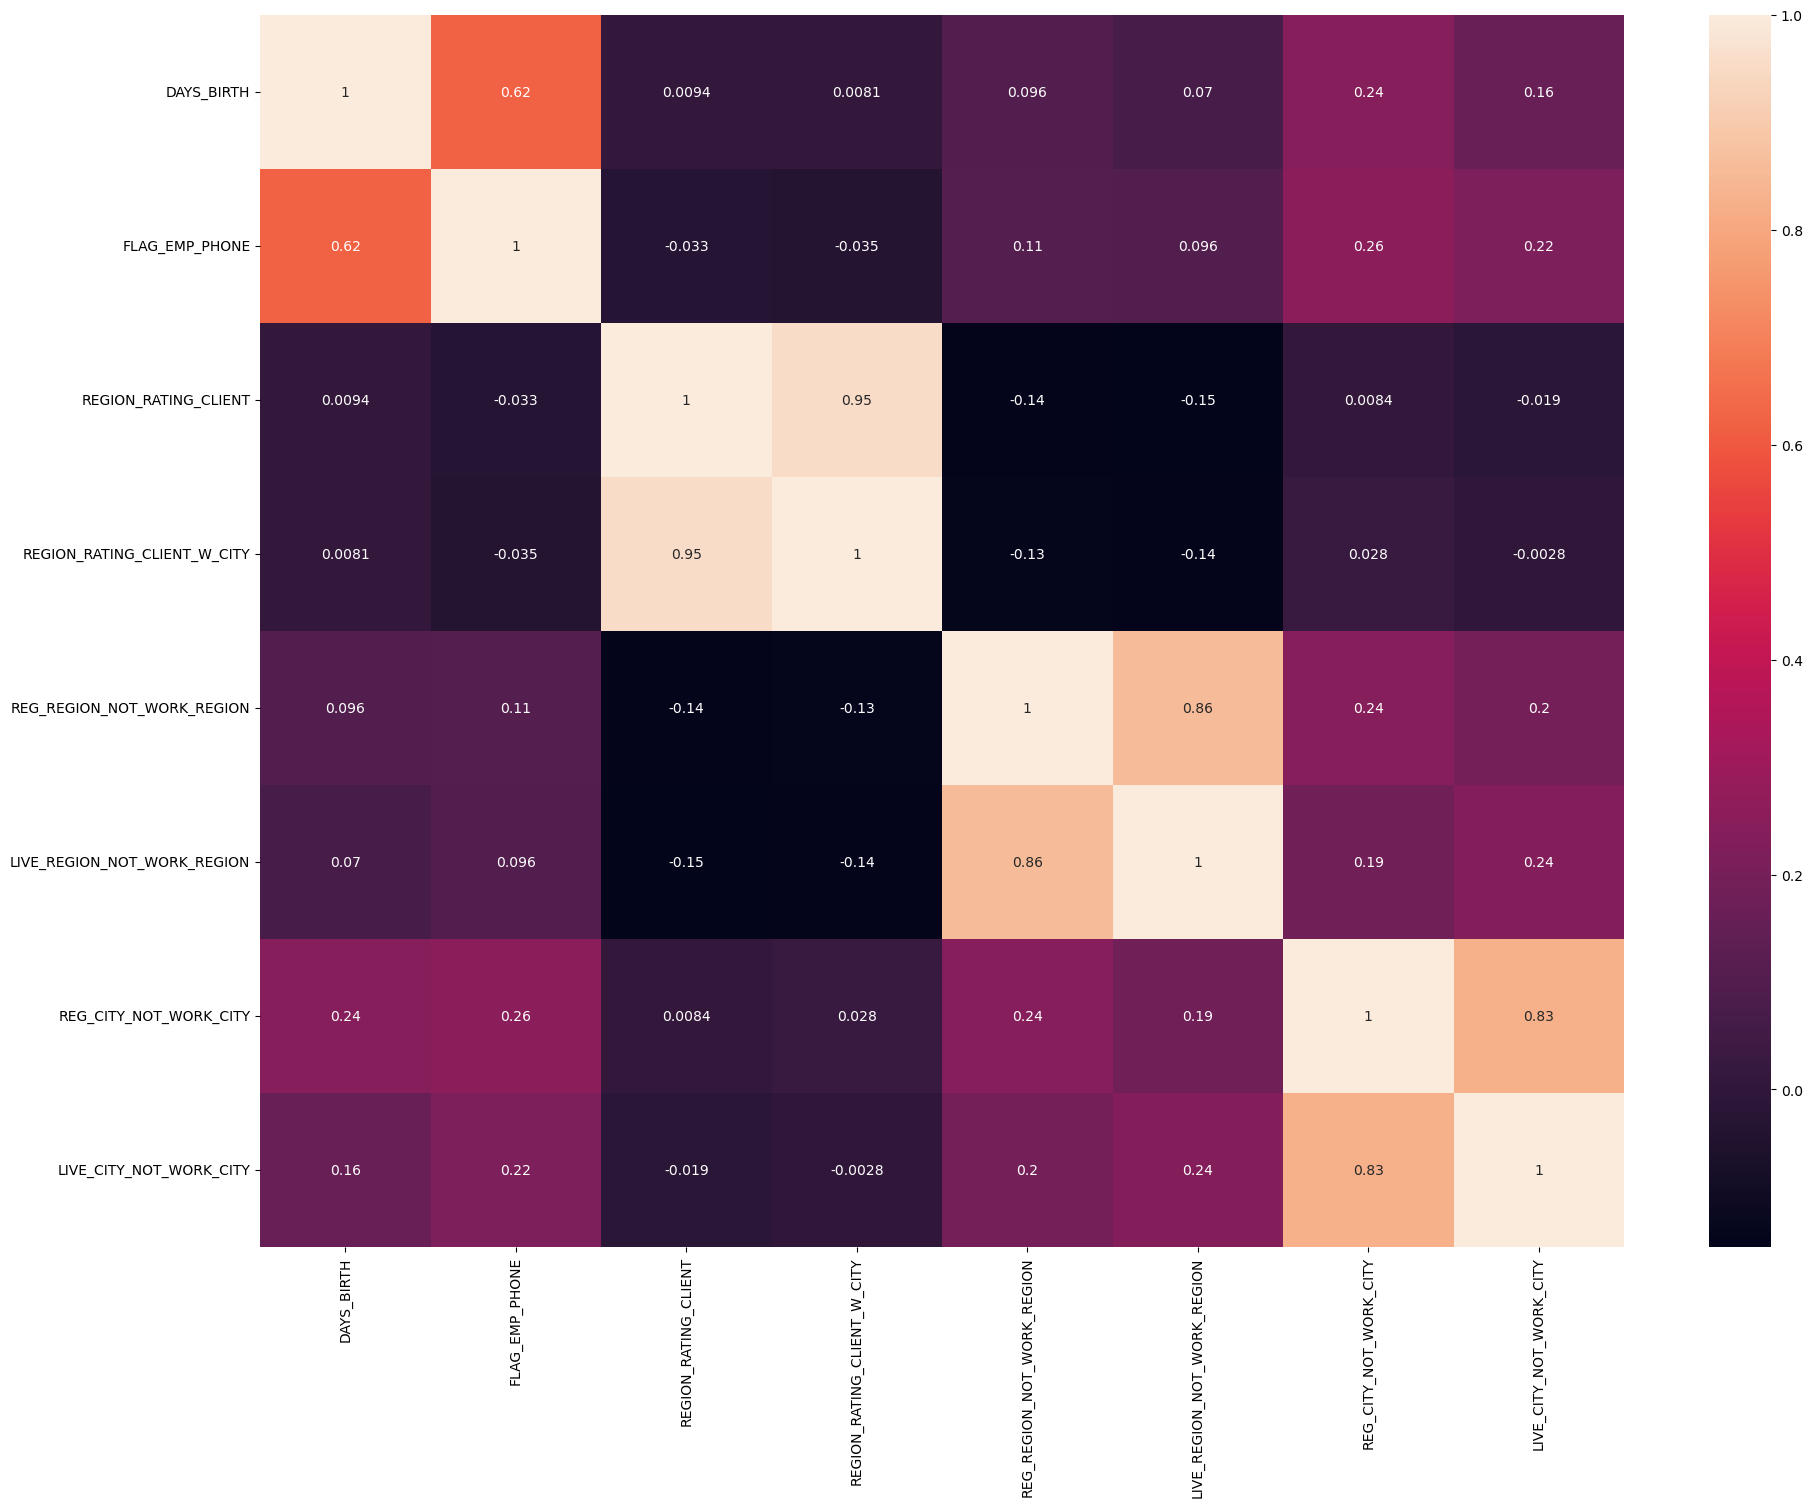

In [37]:
corr(application_train,'int',0,0.6)

In [38]:
drop_int = [x for x in application_train.select_dtypes(include=["int"]) if "REG_REGION_NOT_WORK" in x or "REG_CITY_NOT_WORK" in x or "REGION_RATING_CLIENT_W_CITY" in x or "FLAG_EMP_PHONE" in x]
application_train_int = application_train.select_dtypes(include=["int"]).drop(columns=drop_int)

In [39]:
application_train_int.shape

(307511, 37)

# OBJECT VARIABLES

In [40]:
missing(application_train.select_dtypes(include=["object"]))

column  missing_data
0           NAME_CONTRACT_TYPE           0.0
1                  CODE_GENDER           0.0
2                 FLAG_OWN_CAR           0.0
3              FLAG_OWN_REALTY           0.0
4              NAME_TYPE_SUITE           0.4
5             NAME_INCOME_TYPE           0.0
6          NAME_EDUCATION_TYPE           0.0
7           NAME_FAMILY_STATUS           0.0
8            NAME_HOUSING_TYPE           0.0
9              OCCUPATION_TYPE          31.3
10  WEEKDAY_APPR_PROCESS_START           0.0
11           ORGANIZATION_TYPE           0.0
12          FONDKAPREMONT_MODE          68.4
13              HOUSETYPE_MODE          50.2
14          WALLSMATERIAL_MODE          50.8
15         EMERGENCYSTATE_MODE          47.4

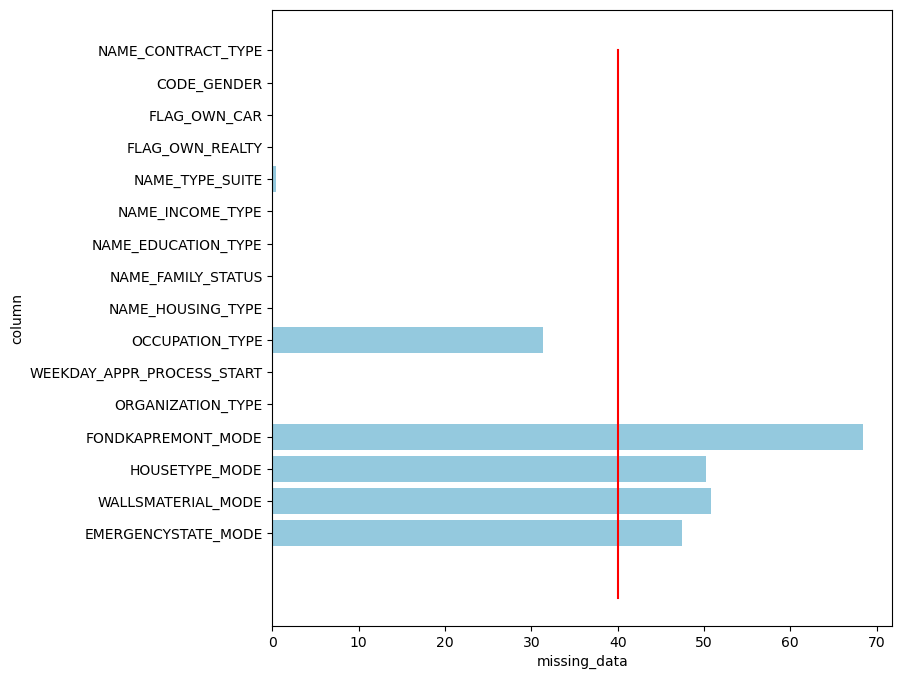

In [41]:
plt.figure(figsize=(8,8))
sns.barplot(x="missing_data", y="column", data=missing(application_train.select_dtypes(include=["object"])), color="skyblue")
plt.plot([40,40],[0,17], color="red")

In [42]:
HomeCredit_columns_description[HomeCredit_columns_description['Row'] == "FONDKAPREMONT_MODE"]

Unnamed: 0                         Table                 Row  \
86          89  application_{train|test}.csv  FONDKAPREMONT_MODE   

                                          Description     Special  
86  Normalized information about building where th...  normalized

In [43]:
application_train_obj = application_train.select_dtypes(include=["object"])

In [44]:
application_train_obj.shape

(307511, 16)

# Encode OBJ

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
application_train_obj.nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [47]:
le = LabelEncoder()

In [48]:
columns_object_impute = ["NAME_TYPE_SUITE","OCCUPATION_TYPE","FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]

In [49]:
application_train_obj[columns_object_impute]

NAME_TYPE_SUITE OCCUPATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0        Unaccompanied        Laborers   reg oper account  block of flats   
1               Family      Core staff   reg oper account  block of flats   
2        Unaccompanied        Laborers                NaN             NaN   
3        Unaccompanied        Laborers                NaN             NaN   
4        Unaccompanied      Core staff                NaN             NaN   
...                ...             ...                ...             ...   
307506   Unaccompanied     Sales staff   reg oper account  block of flats   
307507   Unaccompanied             NaN   reg oper account  block of flats   
307508   Unaccompanied        Managers   reg oper account  block of flats   
307509   Unaccompanied        Laborers                NaN  block of flats   
307510   Unaccompanied        Laborers                NaN  block of flats   

       WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0            Stone, brick                  No  
1                   Block                  No  
2                     NaN                 NaN  
3                     NaN                 NaN  
4                     NaN                 NaN  
...                   ...                 ...  
307506       Stone, brick                  No  
307507       Stone, brick                  No  
307508              Panel                  No  
307509       Stone, brick                  No  
307510              Panel                  No  

[307511 rows x 6 columns]

In [50]:
application_train_obj[columns_object_impute].apply(LabelEncoder().fit_transform)

NAME_TYPE_SUITE  OCCUPATION_TYPE  FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0                     6                8                   2               0   
1                     1                3                   2               0   
2                     6                8                   4               3   
3                     6                8                   4               3   
4                     6                3                   4               3   
...                 ...              ...                 ...             ...   
307506                6               14                   2               0   
307507                6               18                   2               0   
307508                6               10                   2               0   
307509                6                8                   4               0   
307510                6                8                   4               0   

        WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  
0                        5                    0  
1                        0                    0  
2                        7                    2  
3                        7                    2  
4                        7                    2  
...                    ...                  ...  
307506                   5                    0  
307507                   5                    0  
307508                   4                    0  
307509                   5                    0  
307510                   4                    0  

[307511 rows x 6 columns]

<Axes: >

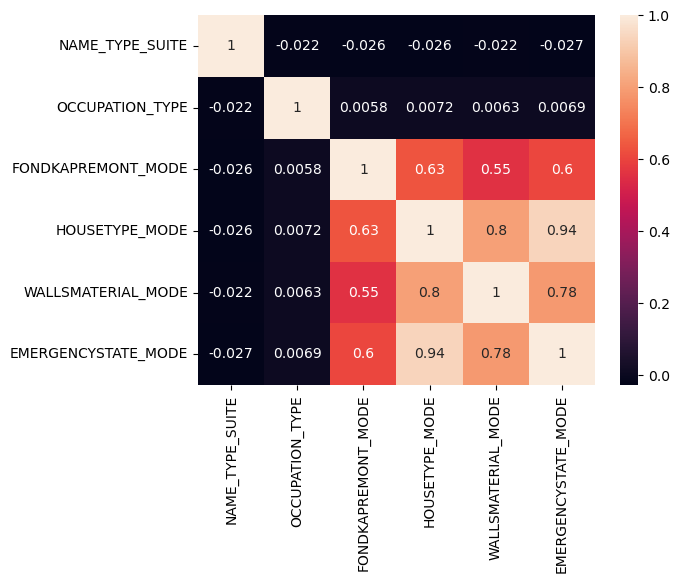

In [51]:
sns.heatmap(application_train_obj[columns_object_impute].apply(LabelEncoder().fit_transform).corr(),annot=True)

In [52]:
drop_obj = [ x for x in application_train.select_dtypes(include=["object"]) if "FONDKAPREMONT_MODE" in x or "WALLSMATERIAL" in x or "EMERGENCYSTATE_MODE" in x]
application_train_obj = application_train.select_dtypes(include=["object"]).drop(columns=drop_obj)

In [53]:
application_train_obj.shape

(307511, 13)

In [54]:
application_train_obj

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  HOUSETYPE_MODE  
0                       WEDNESDAY  Business Entity Type 3  block of flats  
1                          MONDAY                  School  block of flats  
2                          MONDAY              Government             NaN  
3                       WEDNESDAY  Business Entity Type 3             NaN  
4                        THURSDAY                Religion             NaN  
...                           ...                     ...             ...  
307506                   THURSDAY                Services  block of flats  
307507                     MONDAY                     XNA  block of flats  
307508                   THURSDAY                  School  block of flats  
307509                  WEDNESDAY  Business Entity Type 1  block of flats  
307510                   THURSDAY  Business Entity Type 3  block of flats  

[307511 rows x 13 columns]

In [55]:
final_df_1 = application_train_int.join(application_train_float)
final_df = final_df_1.join(application_train_obj)

In [56]:
final_df

SK_ID_CURR  TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0           100002       1             0       -9461           -637   
1           100003       0             0      -16765          -1188   
2           100004       0             0      -19046           -225   
3           100006       0             0      -19005          -3039   
4           100007       0             0      -19932          -3038   
...            ...     ...           ...         ...            ...   
307506      456251       0             0       -9327           -236   
307507      456252       0             0      -20775         365243   
307508      456253       0             0      -14966          -7921   
307509      456254       1             0      -11961          -4786   
307510      456255       0             0      -16856          -1262   

        DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                 -2120           1                0                 1   
1                  -291           1                0                 1   
2                 -2531           1                1                 1   
3                 -2437           1                0                 1   
4                 -3458           1                0                 1   
...                 ...         ...              ...               ...   
307506            -1982           1                0                 1   
307507            -4090           1                0                 1   
307508            -5150           1                0                 1   
307509             -931           1                0                 1   
307510             -410           1                1                 1   

        FLAG_PHONE  ...  FLAG_OWN_REALTY  NAME_TYPE_SUITE  \
0                1  ...                Y    Unaccompanied   
1                1  ...                N           Family   
2                1  ...                Y    Unaccompanied   
3                0  ...                Y    Unaccompanied   
4                0  ...                Y    Unaccompanied   
...            ...  ...              ...              ...   
307506           0  ...                N    Unaccompanied   
307507           1  ...                Y    Unaccompanied   
307508           0  ...                Y    Unaccompanied   
307509           0  ...                Y    Unaccompanied   
307510           1  ...                N    Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working  Secondary / secondary special   
1              State servant               Higher education   
2                    Working  Secondary / secondary special   
3                    Working  Secondary / secondary special   
4                    Working  Secondary / secondary special   
...                      ...                            ...   
307506               Working  Secondary / secondary special   
307507             Pensioner  Secondary / secondary special   
307508               Working               Higher education   
307509  Commercial associate  Secondary / secondary special   
307510  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
0       Single / not married  House / apartment         Laborers   
1                    Married  House / apartment       Core staff   
2       Single / not married  House / apartment         Laborers   
3             Civil marriage  House / apartment         Laborers   
4       Single / not married  House / apartment       Core staff   
...                      ...                ...              ...   
307506             Separated       With parents      Sales staff   
307507                 Widow  House / apartment              NaN   
307508             Separated  House / apartment         Managers   
307509               Married  House / apartment         Laborers   
307510               Married

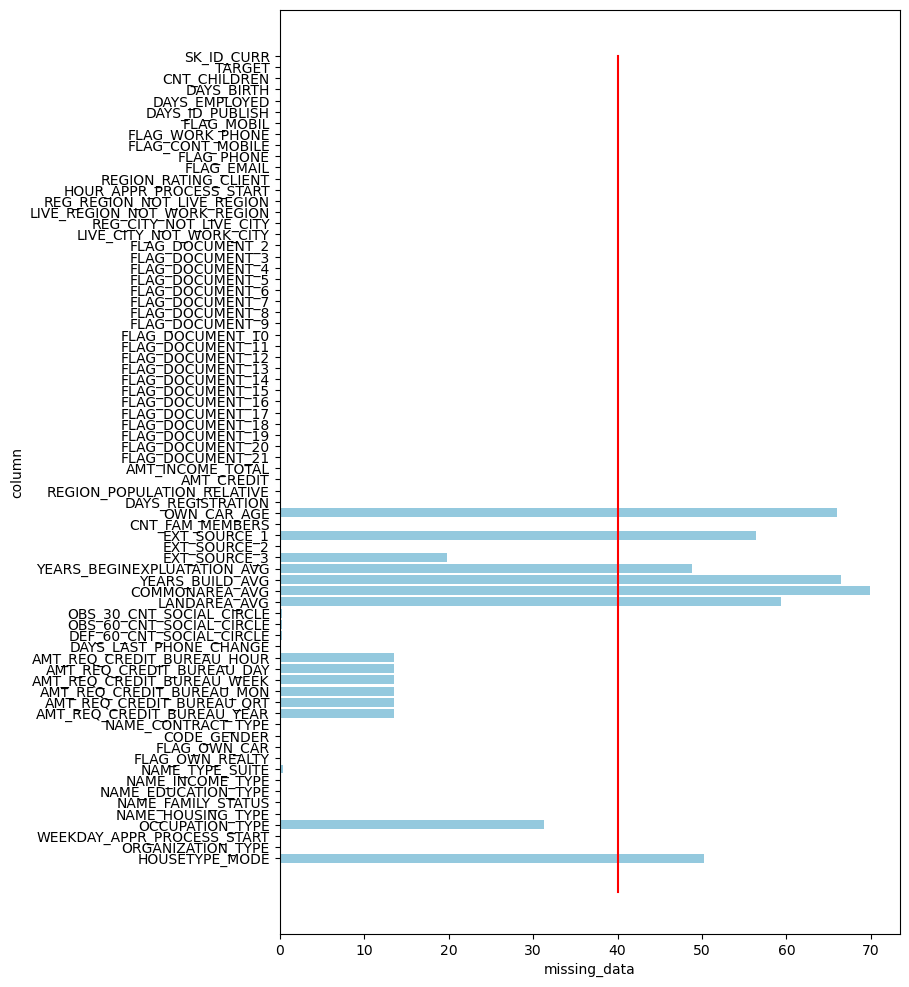

In [57]:
plt.figure(figsize=(8,12))
sns.barplot(x="missing_data", y="column", data=missing(final_df), color="skyblue")
plt.plot([40,40],[0,75], color="red")

# Missing data imputation

## categorical data

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

In [59]:
numerical_cols1 = final_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols1 = final_df.select_dtypes(include=['object']).columns

In [60]:
numerical_data1 = final_df[numerical_cols1]
categorical_data1 = final_df[categorical_cols1]

In [61]:
encoder = OrdinalEncoder()

In [62]:
categorical_data1.fillna('Missing', inplace=True)

C:\Users\m.naja\AppData\Local\Temp\ipykernel_28180\2826396112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data1.fillna('Missing', inplace=True)


In [63]:
categorical_data_encoded1 = encoder.fit_transform(categorical_data1)

In [64]:
categorical_data_encoded1 = pd.DataFrame(categorical_data_encoded1, columns=categorical_cols1)

## numerical data

In [65]:
imputer = IterativeImputer(max_iter=10, random_state=0)
numerical_data_imputed1 = imputer.fit_transform(numerical_data1)
numerical_data_imputed1 = pd.DataFrame(numerical_data_imputed1, columns=numerical_cols1)

In [66]:
final_df = pd.concat([numerical_data_imputed1, categorical_data_encoded1], axis=1)

# Important features 

## Gradient Boosting regression

In [67]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [68]:
X, y = final_df.drop(columns="TARGET"), final_df["TARGET"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)
params1 = {"n_estimators":100, "learning_rate":1.0, "max_depth":1, "random_state":0}

In [70]:
clf1 = ensemble.GradientBoostingClassifier(**params1).fit(X_train, y_train)
clf1.score(X_test, y_test)

0.925923517169615

In [71]:
feature_importances1 = clf1.feature_importances_

In [72]:
indices1 = feature_importances1.argsort()[::-1]

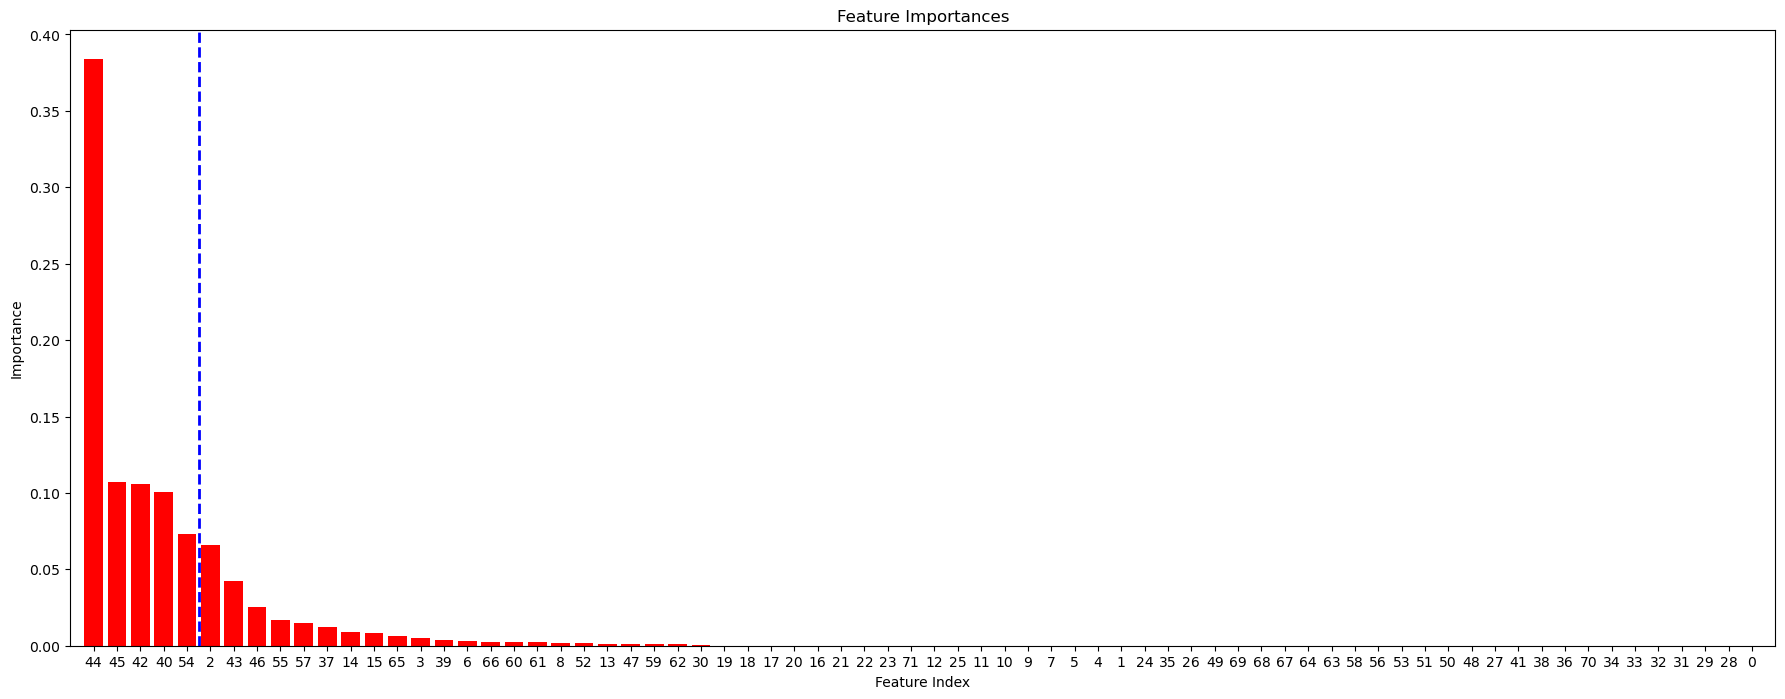

In [73]:
plt.figure(figsize=(22, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances1[indices1], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices1)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.axvline(x=4.5, color='blue', linewidth=2, linestyle='--')
plt.show()

In [74]:
indices1_5 = indices1[:5]

In [75]:
final_df.columns[indices1_5]

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'CNT_FAM_MEMBERS', 'DAYS_REGISTRATION',
       'AMT_REQ_CREDIT_BUREAU_HOUR'],
      dtype='object')

In [76]:
numerical_cols2 = application_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols2 = application_train.select_dtypes(include=['object']).columns
numerical_data2 = application_train[numerical_cols2]
categorical_data2 = application_train[categorical_cols2]

In [77]:
categorical_data2.fillna('Missing', inplace=True)
categorical_data_encoded2 = encoder.fit_transform(categorical_data2)
categorical_data_encoded2 = pd.DataFrame(categorical_data_encoded2, columns=categorical_cols2)

C:\Users\m.naja\AppData\Local\Temp\ipykernel_28180\2976216390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data2.fillna('Missing', inplace=True)


In [78]:
numerical_data_imputed2 = imputer.fit_transform(numerical_data2)
numerical_data_imputed2 = pd.DataFrame(numerical_data_imputed2, columns=numerical_cols2)

In [79]:
application_train_brut = pd.concat([numerical_data_imputed2, categorical_data_encoded2], axis=1)

In [80]:
X, y = application_train_brut.drop(columns="TARGET"), application_train_brut["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)
params2 = {"n_estimators":100, "learning_rate":1.0, "max_depth":1, "random_state":0}
clf2 = ensemble.GradientBoostingClassifier(**params2).fit(X_train, y_train)
clf2.score(X_test, y_test)
feature_importances2 = clf2.feature_importances_

In [81]:
clf2.score(X_test, y_test)

0.9269966181061394

In [82]:
indices2 = feature_importances2.argsort()[::-1]

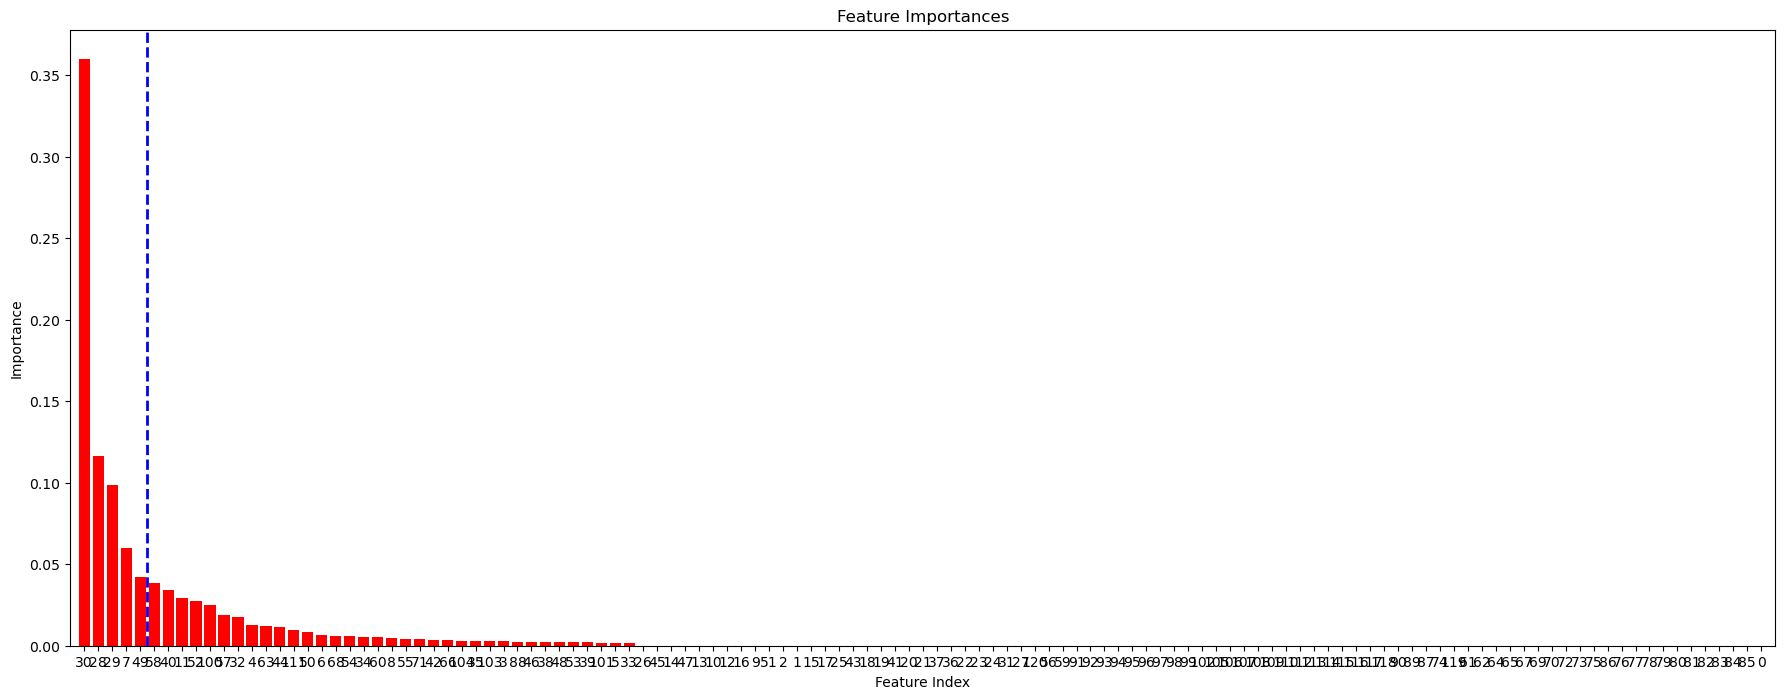

In [83]:
plt.figure(figsize=(22, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances2[indices2], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices2)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.axvline(x=4.5, color='blue', linewidth=2, linestyle='--')
plt.show()

In [84]:
indices2_5 = indices2[:5]

In [85]:
application_train_brut.columns[indices2_5]

Index(['EXT_SOURCE_2', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'REGION_POPULATION_RELATIVE', 'YEARS_BUILD_MODE'],
      dtype='object')

In [86]:
feat2 = pd.DataFrame(application_train_brut.columns[indices2_5])
feat2.rename(columns={0 :'imp_feat2_all'}, inplace=True)
feat1 = pd.DataFrame(final_df.columns[indices1_5])
feat1.rename(columns={0 :'imp_feat1_corr_remove'}, inplace=True)

In [87]:
featmix1 = pd.DataFrame(application_train_brut.columns[indices2_5][:6])
featmix1.rename(columns={0 :'imp_featmix'}, inplace=True)
featmix2 = pd.DataFrame(final_df.columns[indices1_5][:5])
featmix2.rename(columns={0 :'imp_featmix'}, inplace=True)
featmix = [featmix1,featmix2]
featmix = pd.concat(featmix).drop_duplicates().reset_index(drop=True)

In [88]:
imp_feat = feat2.join(feat1)

In [89]:
imp_feat = imp_feat.join(featmix)

In [90]:
imp_feat

imp_feat2_all       imp_feat1_corr_remove  \
0                EXT_SOURCE_2                EXT_SOURCE_2   
1     LIVE_CITY_NOT_WORK_CITY                EXT_SOURCE_3   
2                EXT_SOURCE_1             CNT_FAM_MEMBERS   
3  REGION_POPULATION_RELATIVE           DAYS_REGISTRATION   
4            YEARS_BUILD_MODE  AMT_REQ_CREDIT_BUREAU_HOUR   

                  imp_featmix  
0                EXT_SOURCE_2  
1     LIVE_CITY_NOT_WORK_CITY  
2                EXT_SOURCE_1  
3  REGION_POPULATION_RELATIVE  
4            YEARS_BUILD_MODE

In [91]:
HomeCredit_columns_description[HomeCredit_columns_description.Row == "EXT_SOURCE_2"].Description # Name of the most important feature 

42    Normalized score from external data source
Name: Description, dtype: object

### The most important feature is the EXT_SOURCE_2 which corresponds to a Normalized score from external data source, the next features are less lower than the first one, we will incorporate the first 5 features in the models training.

In [92]:
featmix_5 = imp_feat.imp_featmix.tolist()

## Performance test of the 3 datasets

In [93]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [94]:
final_df_5 = final_df[final_df.columns[indices1_5]]

In [95]:
final_df_5 = final_df[["TARGET"]].join(final_df_5)

In [96]:
application_train_brut_5 = application_train_brut[application_train_brut.columns[indices2_5]]

In [97]:
application_train_brut_5 = application_train_brut[["TARGET"]].join(application_train_brut_5)

In [98]:
datafeatmix_5 = application_train_brut[featmix_5]

In [99]:
datafeatmix_5 = application_train_brut[["TARGET"]].join(datafeatmix_5)

In [100]:
X1, y1 = final_df_5.drop(columns="TARGET"), final_df_5["TARGET"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
params1 = {"n_estimators":100, "learning_rate":1.0, "max_depth":1, "random_state":0}
clf1 = ensemble.GradientBoostingClassifier(**params1).fit(X_train1, y_train1)

In [101]:
X2, y2 = application_train_brut_5.drop(columns="TARGET"), application_train_brut_5["TARGET"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)
params2 = {"n_estimators":100, "learning_rate":1.0, "max_depth":1, "random_state":0}
clf2 = ensemble.GradientBoostingClassifier(**params2).fit(X_train2, y_train2)

In [102]:
X3, y3 = datafeatmix_5.drop(columns="TARGET"), datafeatmix_5["TARGET"]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0)
params3 = {"n_estimators":100, "learning_rate":1.0, "max_depth":1, "random_state":0}
clf3 = ensemble.GradientBoostingClassifier(**params3).fit(X_train3, y_train3)

In [103]:
y_pred1 = clf1.predict(X_test1)
y_pred_proba1 = clf1.predict_proba(X_test1)[:, 1]  

In [104]:
y_pred2 = clf2.predict(X_test2)
y_pred_proba2 = clf2.predict_proba(X_test2)[:, 1] 

In [105]:
y_pred3 = clf3.predict(X_test3)
y_pred_proba3 = clf3.predict_proba(X_test3)[:, 1] 

In [106]:
precision1 = precision_score(y_test1, y_pred1)
recall1 = recall_score(y_test1, y_pred1)

In [107]:
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)

In [108]:
precision3 = precision_score(y_test3, y_pred3)
recall3 = recall_score(y_test3, y_pred3)

In [109]:
auc1 = roc_auc_score(y_test1, y_pred_proba1)
auc2 = roc_auc_score(y_test2, y_pred_proba2)
auc3 = roc_auc_score(y_test3, y_pred_proba3)

In [110]:
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")
print(f"AUC: {auc1:.2f}")

Precision: 0.55
Recall: 0.02
AUC: 0.75


In [111]:
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"AUC: {auc2:.2f}")

Precision: 0.45
Recall: 0.00
AUC: 0.73


In [112]:
print(f"Precision: {precision3:.2f}")
print(f"Recall: {recall3:.2f}")
print(f"AUC: {auc3:.2f}")

Precision: 0.45
Recall: 0.00
AUC: 0.73


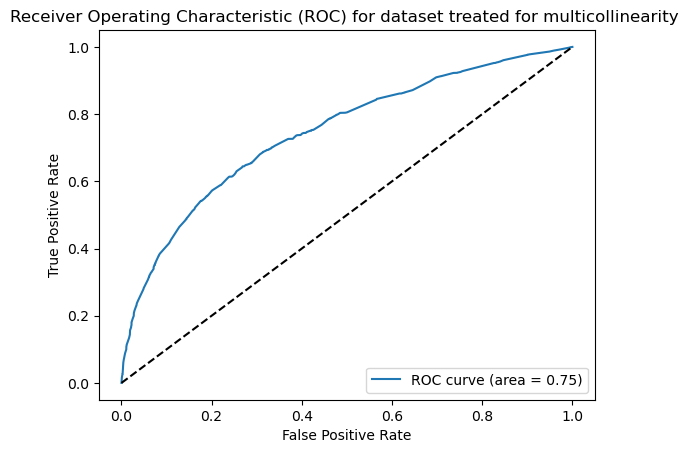

In [113]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale pour un modèle aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for dataset treated for multicollinearity ')
plt.legend(loc="lower right")
plt.show()

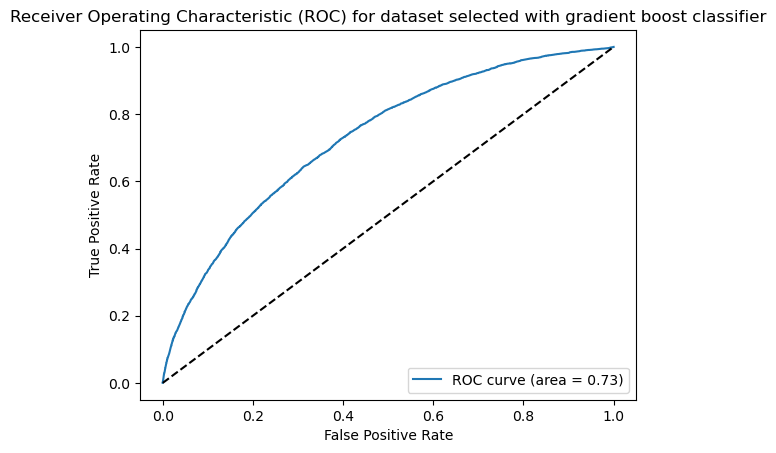

In [114]:
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba2)
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale pour un modèle aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for dataset selected with gradient boost classifier')
plt.legend(loc="lower right")
plt.show()

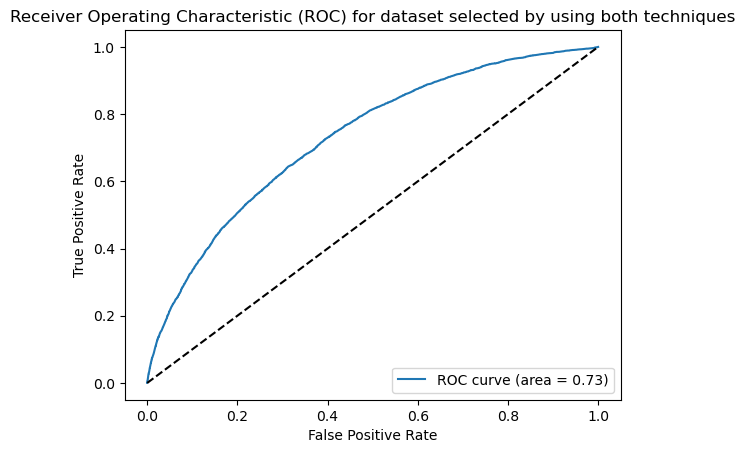

In [115]:
fpr, tpr, thresholds = roc_curve(y_test3, y_pred_proba3)
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale pour un modèle aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for dataset selected by using both techniques')
plt.legend(loc="lower right")
plt.show()

### The selected dataset is based on the most important features selected by using Gradient boosting Classifier after removing collinear features 

# Distribution of target variable

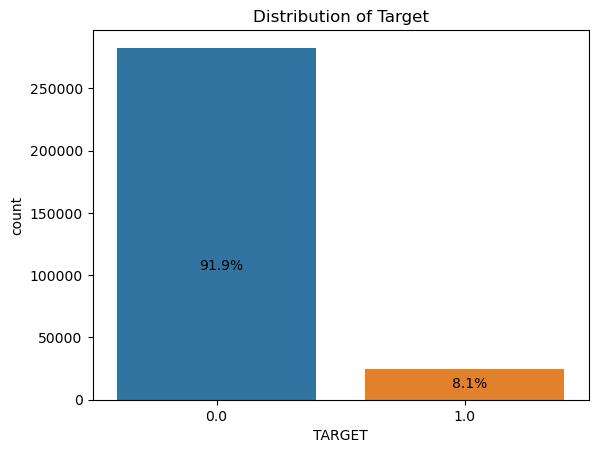

In [116]:
# Distribution of the resampled target variable 
value_counts = final_df_5['TARGET'].value_counts(normalize=True) * 100
ax = sns.countplot(x="TARGET", data=datafeatmix_5, order=value_counts.index)
plt.title("Distribution of Target")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(final_df_5))
    x = p.get_x() + p.get_width() / 1.7 - 0.05
    y = p.get_y() + p.get_height() / 2.7
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show()

### The dataset is very unbalanced therefore we will resample the dataset to maximize the the lower Target category=1

In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
sm = SMOTE(random_state=0)

In [119]:
resampled_X, y_resampled = sm.fit_resample(final_df_5.drop(columns="TARGET"), final_df_5["TARGET"])

In [120]:
resampled_df = pd.DataFrame(y_resampled).join(resampled_X)

In [121]:
resampled_df

TARGET  EXT_SOURCE_2  EXT_SOURCE_3  CNT_FAM_MEMBERS  \
0          1.0      0.262949      0.139376         1.000000   
1          0.0      0.622246      0.522989         2.000000   
2          0.0      0.555912      0.729567         1.000000   
3          0.0      0.650442      0.549183         2.000000   
4          0.0      0.322738      0.562576         1.000000   
...        ...           ...           ...              ...   
565367     1.0      0.456379      0.587516         1.000000   
565368     1.0      0.385617      0.415945         1.000000   
565369     1.0      0.578648      0.167469         2.844747   
565370     1.0      0.625948      0.304622         1.936283   
565371     1.0      0.562344      0.225605         4.000000   

        DAYS_REGISTRATION  AMT_REQ_CREDIT_BUREAU_HOUR  
0            -3648.000000                    0.000000  
1            -1186.000000                    0.000000  
2            -4260.000000                    0.000000  
3            -9833.000000                    0.005864  
4            -4311.000000                    0.000000  
...                   ...                         ...  
565367        -153.984893                    0.000000  
565368       -4605.886632                    0.000000  
565369       -1704.000000                    0.000000  
565370       -6179.127434                    0.000000  
565371         -24.418780                    0.003482  

[565372 rows x 6 columns]

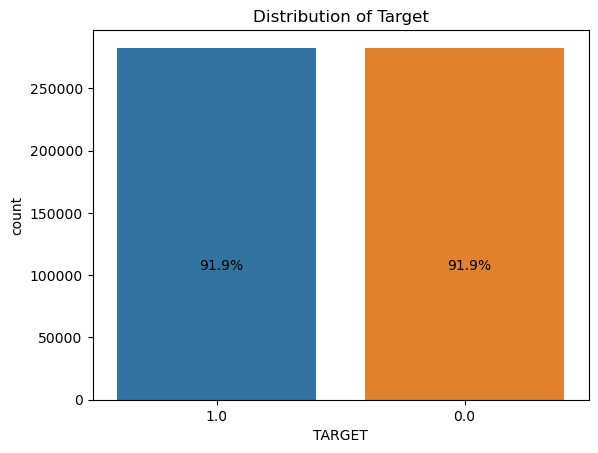

In [122]:
# Distribution of the resampled target variable 
value_counts = resampled_df['TARGET'].value_counts(normalize=True) * 100
ax = sns.countplot(x="TARGET", data=resampled_df, order=value_counts.index)
plt.title("Distribution of Target")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(final_df_5))
    x = p.get_x() + p.get_width() / 1.7 - 0.05
    y = p.get_y() + p.get_height() / 2.7
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show()

In [123]:
# Define the business cost function
def business_cost(y_true, y_pred, cost_fn, cost_fp):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (cost_fn * fn) + (cost_fp * fp)

In [124]:
# Define the function to optimize the threshold
def optimize_threshold(y_true, y_pred_proba, cost_fn, cost_fp):
    thresholds = np.linspace(0, 1, 100)
    costs = []
    for threshold in thresholds:
        y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
        costs.append(business_cost(y_true, y_pred, cost_fn, cost_fp))
    optimal_threshold = thresholds[np.argmin(costs)]
    return optimal_threshold, min(costs)

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [126]:
scaler = StandardScaler()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(resampled_df.drop(columns=['TARGET']), resampled_df['TARGET'],train_size=0.95)

In [128]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Classifier

In [129]:
with mlflow.start_run():
    params = {"n_estimators":[100,200], "learning_rate":[0.1,0.5], "max_depth":[3,5]}
    # Create and train model
    GBC = ensemble.GradientBoostingClassifier()

    gsvgbc = GridSearchCV(GBC, params, cv=5)
    gsvgbc.fit(X_train_scaled, y_train)
    
    mlflow.log_params(gsvgbc.best_params_)
    
    pipeline_gbc = Pipeline([('scaler', StandardScaler()), 
                              ('GBC', ensemble.GradientBoostingClassifier(**gsvgbc.best_params_))])
    
    pipeline_gbc.fit(X_train, y_train)
    
    y_pred_proba = pipeline_gbc.predict_proba(final_df_5.drop(columns="TARGET"))
    
    # Optimize the threshold based on the business cost
    cost_fn = 10  # Cost of a false negative
    cost_fp = 1   # Cost of a false positive
    optimal_threshold, min_cost = optimize_threshold(final_df_5["TARGET"], y_pred_proba, cost_fn, cost_fp)
    
    # Log the optimal threshold and minimum cost
    mlflow.log_metric("optimal_threshold GBC", optimal_threshold)
    mlflow.log_metric("min_cost GBC", min_cost)
    
    y_pred_adjusted = (y_pred_proba[:,1] >= optimal_threshold).astype(int)
    
    # Create metrics
    precision = precision_score(final_df_5["TARGET"], y_pred_adjusted)
    recall = recall_score(final_df_5["TARGET"], y_pred_adjusted)
    auc = roc_auc_score(final_df_5["TARGET"], y_pred_proba[:,1])
    
    # Log metrics
    mlflow.log_metric("precision GBC", precision)
    mlflow.log_metric("recall GBC", recall)
    mlflow.log_metric("auc GBC", auc)

2024/03/07 19:00:25 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



# K Neighbors Classifier

In [130]:
from sklearn.neighbors import KNeighborsClassifier
with mlflow.start_run():
    params = {"n_neighbors":[3,5], 'weights':['uniform', 'distance'], 'metric':['euclidean','minkowski']}
    # Create and train model
    model = KNeighborsClassifier()

    gsvknn = GridSearchCV(model, params, cv=5)
    gsvknn.fit(X_train_scaled, y_train)
    
    mlflow.log_params(gsvknn.best_params_)
    
    pipeline_knn = Pipeline([('scaler', StandardScaler()), 
                              ('model', KNeighborsClassifier(**gsvknn.best_params_))])
    
    pipeline_knn.fit(X_train, y_train)
    
    y_pred_proba = pipeline_knn.predict_proba(final_df_5.drop(columns="TARGET"))
    
    # Optimize the threshold based on the business cost
    cost_fn = 10  # Cost of a false negative
    cost_fp = 1   # Cost of a false positive
    optimal_threshold, min_cost = optimize_threshold(final_df_5["TARGET"], y_pred_proba, cost_fn, cost_fp)
    
    # Log the optimal threshold and minimum cost
    mlflow.log_metric("optimal_threshold KNN", optimal_threshold)
    mlflow.log_metric("min_cost KNN", min_cost)
    
    y_pred_adjusted = (y_pred_proba[:,1] >= optimal_threshold).astype(int)
    
    # Create metrics
    precision = precision_score(final_df_5["TARGET"], y_pred_adjusted)
    recall = recall_score(final_df_5["TARGET"], y_pred_adjusted)
    auc = roc_auc_score(final_df_5["TARGET"], y_pred_proba[:,1])
    
    # Log metrics
    mlflow.log_metric("precision KNN", precision)
    mlflow.log_metric("recall KNN", recall)
    mlflow.log_metric("auc KNN", auc)

# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
with mlflow.start_run():
    params = {"penalty":['l1', 'l2', None],"C":[0.5, 1.0, 1.5], 'solver':['lbfgs', 'liblinear', 'newton-cg']}
    # Create and train model
    model = LogisticRegression()

    gsvlr = GridSearchCV(model, params, cv=5)
    gsvlr.fit(X_train_scaled, y_train)
    
    mlflow.log_params(gsvlr.best_params_)
    
    pipeline_lr = Pipeline([('scaler', StandardScaler()), 
                              ('model', LogisticRegression(**gsvlr.best_params_))])
    
    pipeline_lr.fit(X_train, y_train)
    
    y_pred_proba = pipeline_lr.predict_proba(final_df_5.drop(columns="TARGET"))
    
    # Optimize the threshold based on the business cost
    cost_fn = 10  # Cost of a false negative
    cost_fp = 1   # Cost of a false positive
    optimal_threshold, min_cost = optimize_threshold(final_df_5["TARGET"], y_pred_proba, cost_fn, cost_fp)
    
    # Log the optimal threshold and minimum cost
    mlflow.log_metric("optimal_threshold LR", optimal_threshold)
    mlflow.log_metric("min_cost LR", min_cost)
    
    y_pred_adjusted = (y_pred_proba[:,1] >= optimal_threshold).astype(int)
    
    # Create metrics
    precision = precision_score(final_df_5["TARGET"], y_pred_adjusted)
    recall = recall_score(final_df_5["TARGET"], y_pred_adjusted)
    auc = roc_auc_score(final_df_5["TARGET"], y_pred_proba[:,1])
    
    # Log metrics
    mlflow.log_metric("precision LR", precision)
    mlflow.log_metric("recall LR", recall)
    mlflow.log_metric("auc LR", auc)

C:\Users\m.naja\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\m.naja\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\m.naja\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\m.naja\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\m.naja\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\m.naja\AppData\Local\anaconda3\Lib\s

### Le modèle choisit est le KNN C 

In [132]:
# Training the model with the all the dataset

In [133]:
X_resampled_df, y_resampled_df = resampled_df.drop(columns=['TARGET']), pd.DataFrame(resampled_df['TARGET'])

In [134]:
X_train, X_test, y_train, y_test = train_test_split(resampled_df.drop(columns=['TARGET']), resampled_df['TARGET'],train_size=0.95)

In [135]:
with mlflow.start_run():
    # Create and train model
    pipeline_knn.fit(X_resampled_df, y_resampled_df)
    
    y_pred = pipeline_knn.predict(final_df_5.drop(columns="TARGET"))
    y_pred_proba = pipeline_knn.predict_proba(final_df_5.drop(columns="TARGET"))
     
    # Create metrics
    precision = precision_score(final_df_5["TARGET"], y_pred)
    recall = recall_score(final_df_5["TARGET"], y_pred)
    auc = roc_auc_score(final_df_5["TARGET"], y_pred_proba[:,1])
    
    # Log metrics
    mlflow.log_metric("precision KNN_ALL", precision)
    mlflow.log_metric("recall KNN_ALL", recall)
    mlflow.log_metric("auc KNN_ALL", auc)

C:\Users\m.naja\AppData\Local\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [136]:
import pickle

In [137]:
filename = 'creditmodel.sav'

In [138]:
with open(filename, 'wb') as file:
    pickle.dump(pipeline_knn, file) # saving the selected model which is the KNN with best parameters  

In [139]:
import os 

In [140]:
model_path = os.path.abspath(filename)

In [141]:
model_path

'C:\\Users\\m.naja\\creditmodel.sav'

In [142]:
pickled_model = pickle.load(open(filename, 'rb'))

In [143]:
final_df_5.columns

Index(['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CNT_FAM_MEMBERS',
       'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR'],
      dtype='object')

In [144]:
# Name of the application features 
print(list(HomeCredit_columns_description[HomeCredit_columns_description.Row == "EXT_SOURCE_2"].Description))  
print(list(HomeCredit_columns_description[HomeCredit_columns_description.Row == "EXT_SOURCE_3"].Description))  
print(list(HomeCredit_columns_description[HomeCredit_columns_description.Row == "CNT_FAM_MEMBERS"].Description))  
print(list(HomeCredit_columns_description[HomeCredit_columns_description.Row == "DAYS_REGISTRATION"].Description))
print(list(HomeCredit_columns_description[HomeCredit_columns_description.Row == "AMT_REQ_CREDIT_BUREAU_HOUR"].Description))  

['Normalized score from external data source']
['Normalized score from external data source']
['How many family members does client have']
['How many days before the application did client change his registration']
['Number of enquiries to Credit Bureau about the client one hour before application']
